In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4



In [2]:
# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings('ignore')

In [4]:
cd /home/gaurav/Documents/Python/Analytics vidya/Forest classification


/home/gaurav/Documents/Python/Analytics vidya/Forest classification


In [183]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
dataset = train.iloc[:,1:]

In [154]:
dataset.shape

(15120, 55)

In [13]:
dataset.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

In [18]:
pd.set_option('display.max_columns', None)
print(dataset.describe())

          Elevation        Aspect         Slope  \
count  15120.000000  15120.000000  15120.000000   
mean    2749.322553    156.676653     16.501587   
std      417.678187    110.085801      8.453927   
min     1863.000000      0.000000      0.000000   
25%     2376.000000     65.000000     10.000000   
50%     2752.000000    126.000000     15.000000   
75%     3104.000000    261.000000     22.000000   
max     3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%            

In [19]:
# Skewness of the distribution

print(dataset.skew())

# Values close to 0 show less skew
# Several attributes in Soil_Type show a large skew. Hence, some algos may benefit if skew is corrected


Elevation                               0.075640
Aspect                                  0.450935
Slope                                   0.523658
Horizontal_Distance_To_Hydrology        1.488052
Vertical_Distance_To_Hydrology          1.537776
Horizontal_Distance_To_Roadways         1.247811
Hillshade_9am                          -1.093681
Hillshade_Noon                         -0.953232
Hillshade_3pm                          -0.340827
Horizontal_Distance_To_Fire_Points      1.617099
Wilderness_Area1                        1.231244
Wilderness_Area2                        5.228781
Wilderness_Area3                        0.324594
Wilderness_Area4                        0.825798
Soil_Type1                              6.294716
Soil_Type2                              4.617019
Soil_Type3                              3.575995
Soil_Type4                              3.872721
Soil_Type5                              9.416209
Soil_Type6                              4.506716
Soil_Type7          

In [23]:
dataset.groupby('Cover_Type').size()

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
dtype: int64

In [7]:
size = 10 
data = dataset.iloc[:,1:size]


In [8]:
data.head()
cols=data.columns 

In [9]:
data_corr = data.corr()
threshold = 0.5
# List of pairs along with correlation above threshold
corr_list = []

In [11]:
#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if ((data_corr.iloc[i,j] >= 0.5) or (data_corr.iloc[i,j] <= -0.5)):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))
    

IndexError: single positional indexer is out-of-bounds

In [12]:
#import plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
?sns.pairplot()

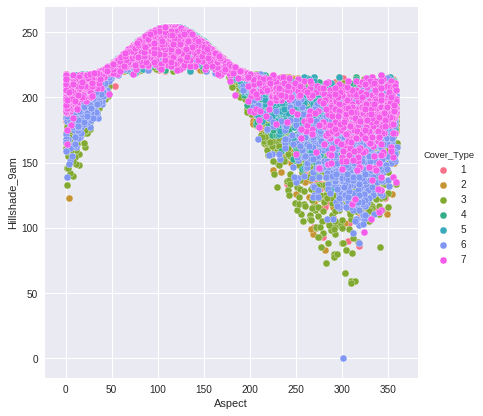

In [107]:
sns.pairplot(dataset, hue= 'Cover_Type', x_vars = 'Aspect', y_vars = 'Hillshade_9am', size = 6)

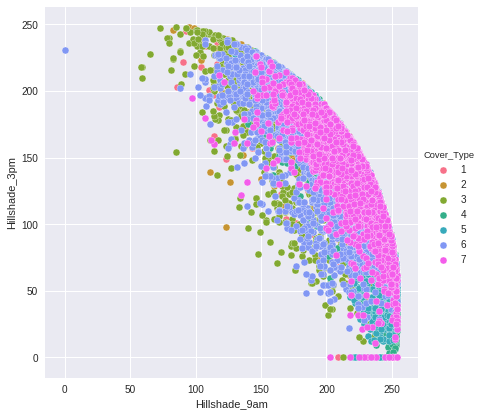

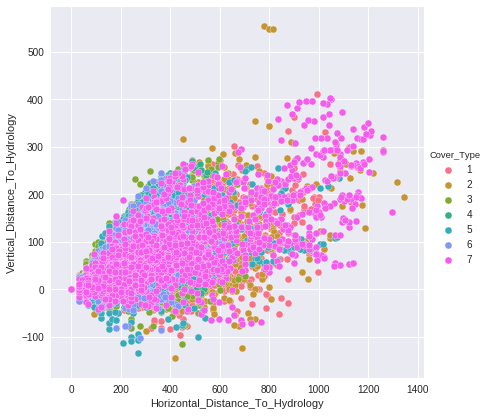

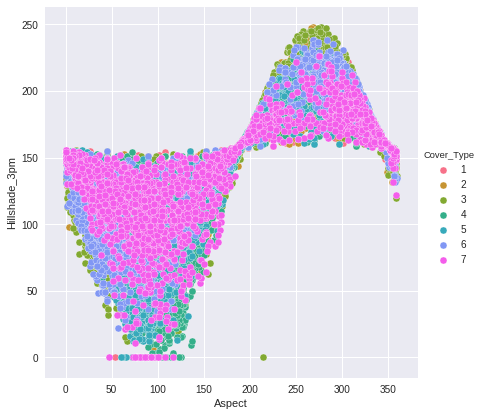

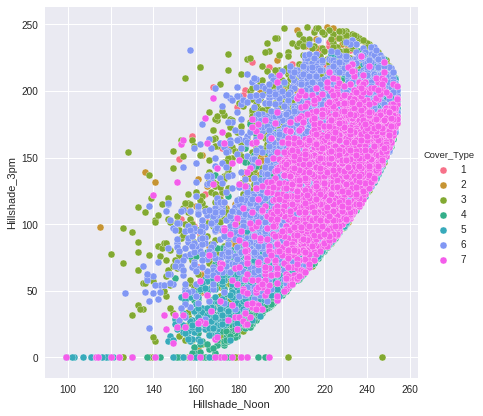

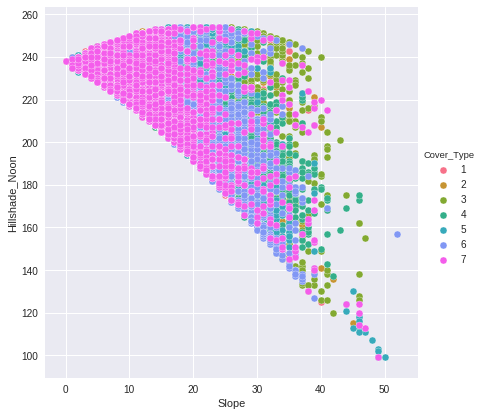

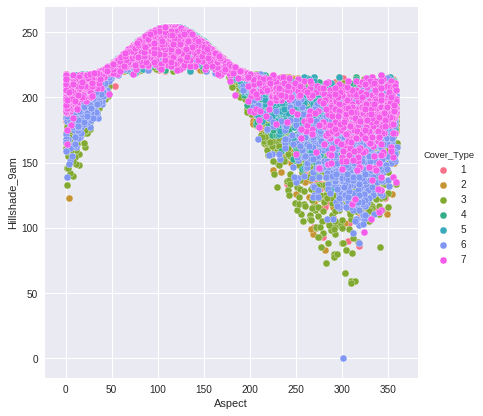

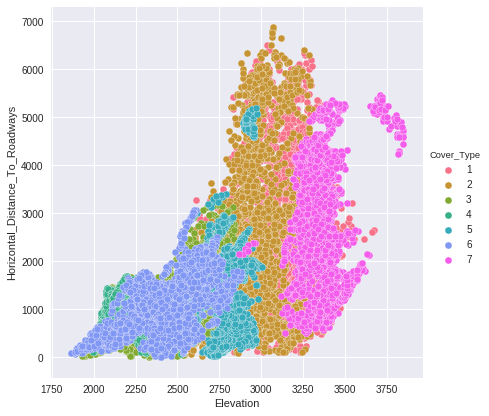

In [108]:
for v,i,j in s_corr_list:
    sns.pairplot(dataset, hue="Cover_Type", size=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()


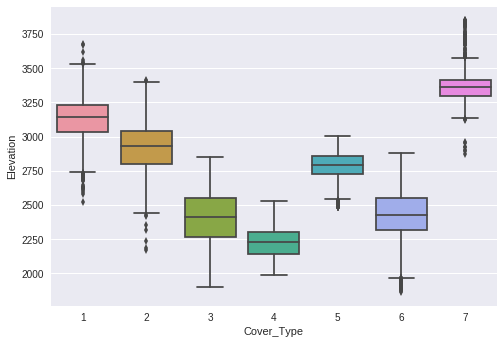

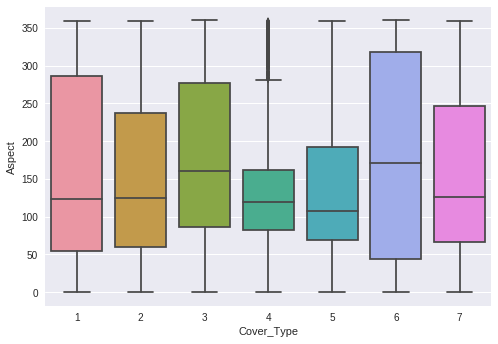

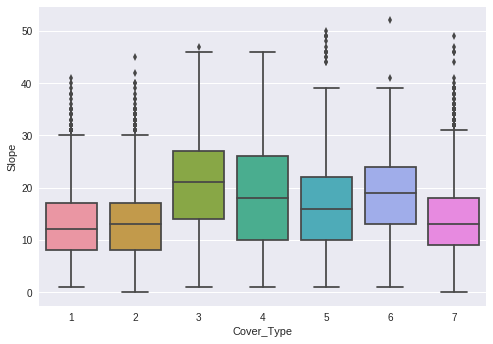

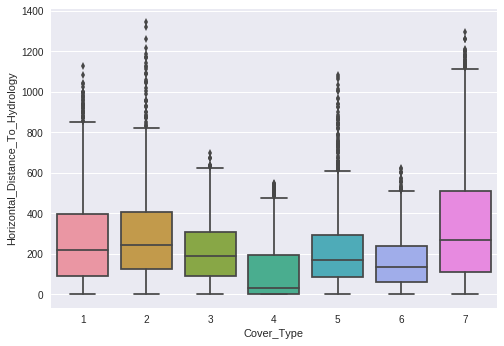

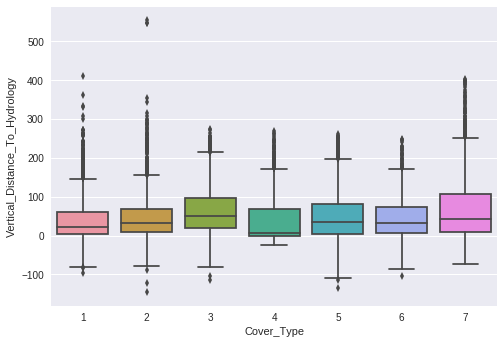

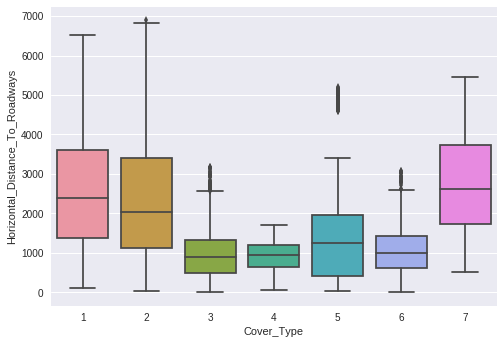

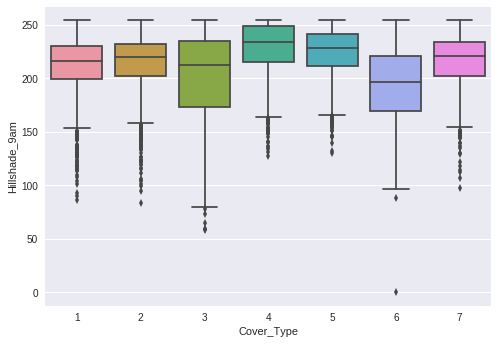

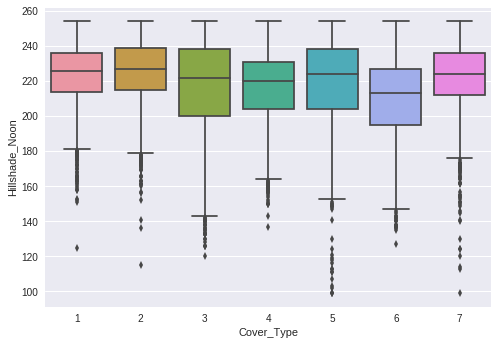

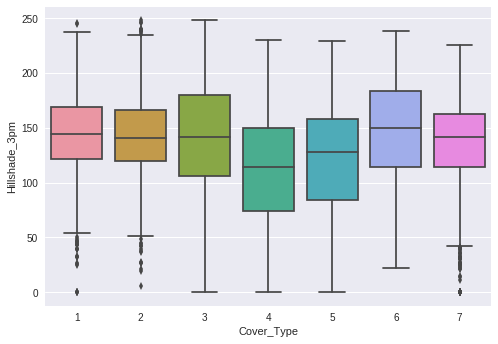

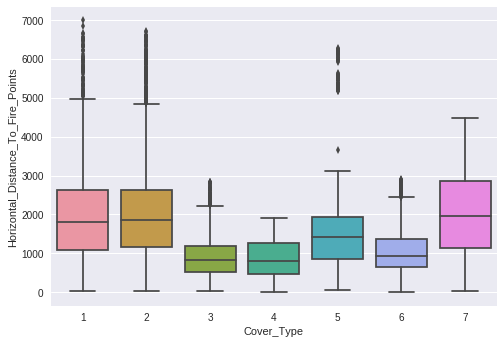

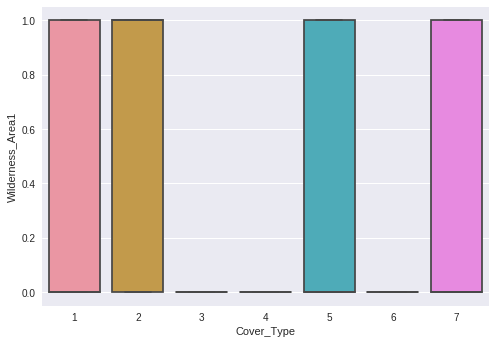

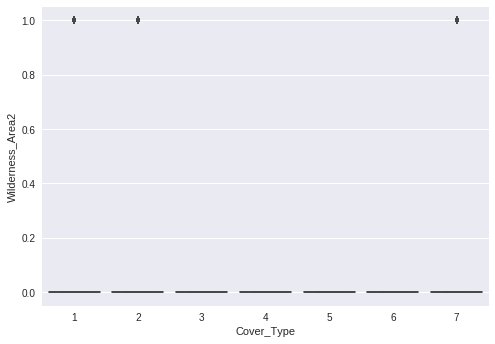

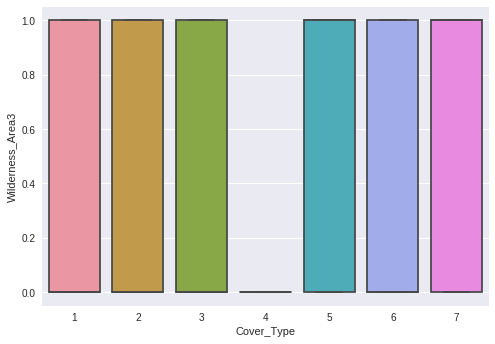

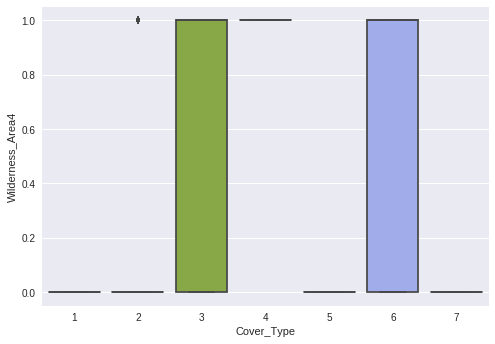

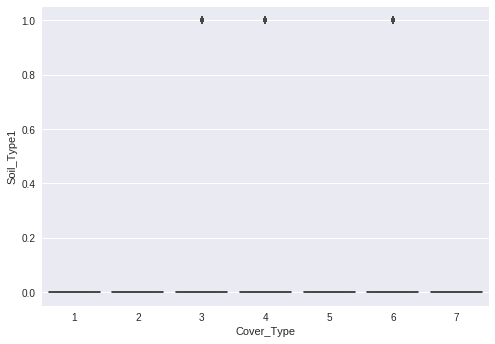

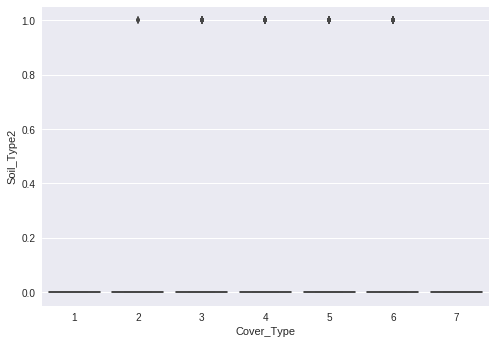

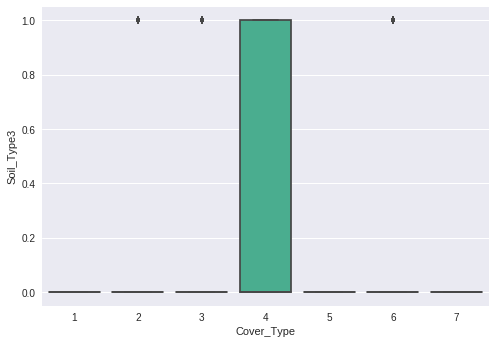

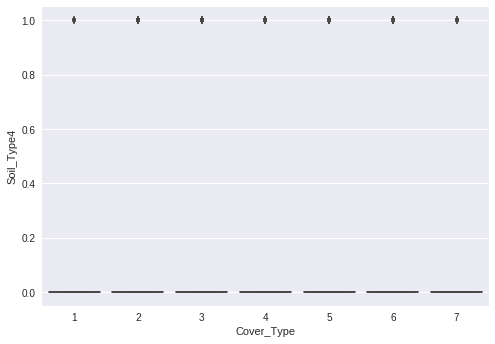

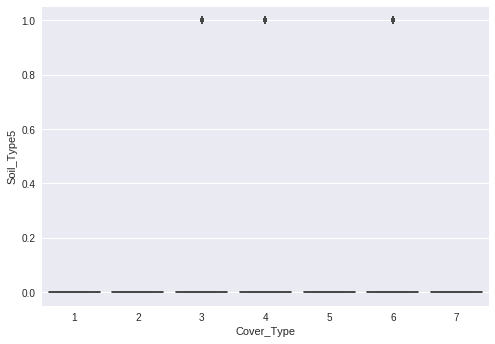

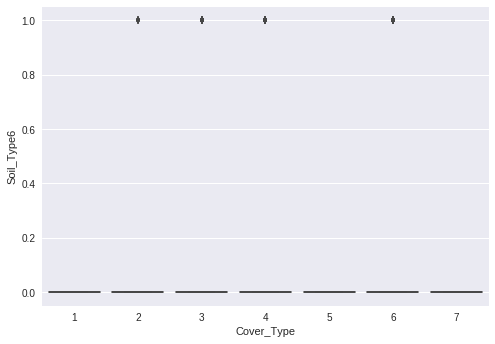

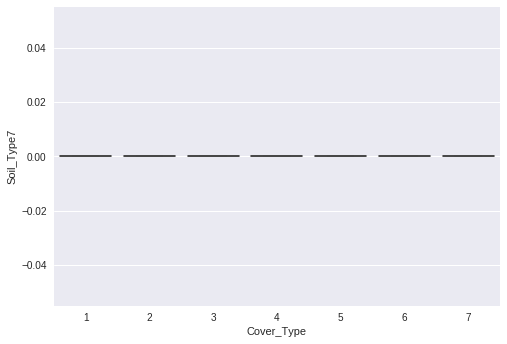

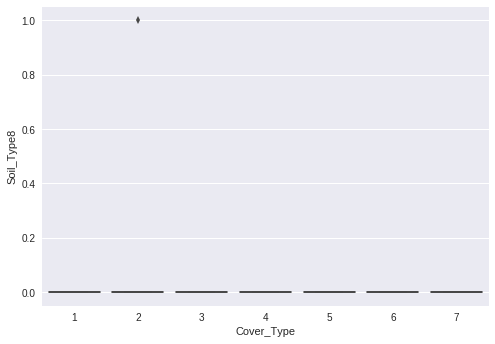

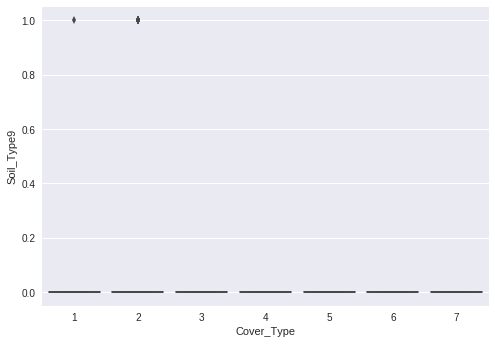

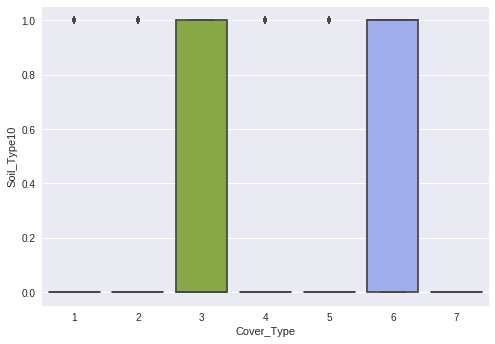

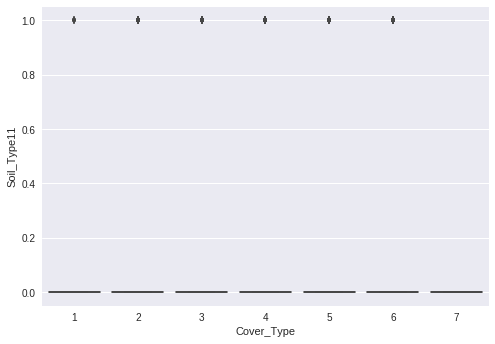

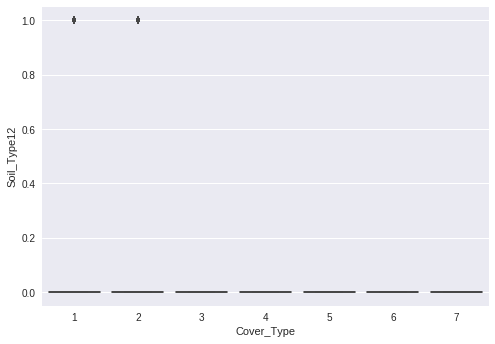

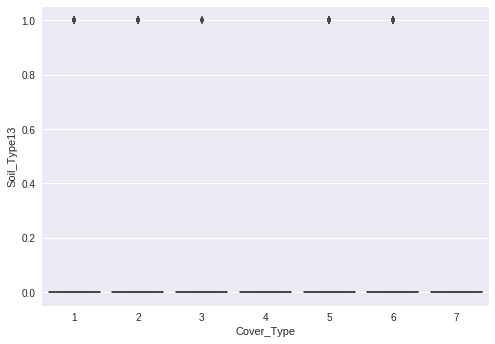

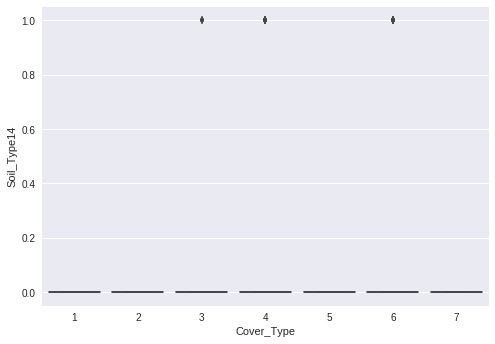

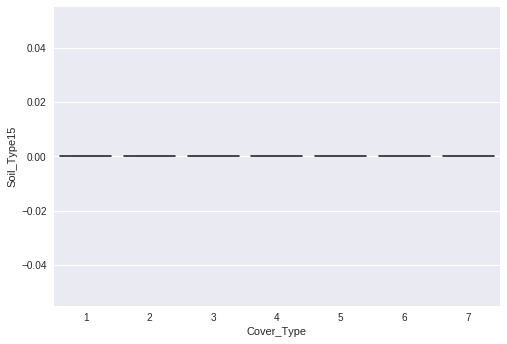

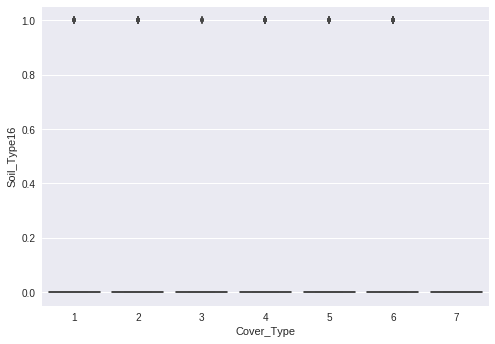

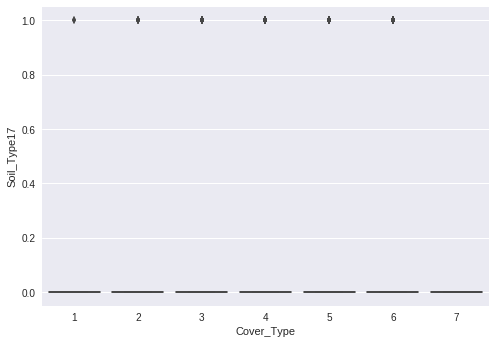

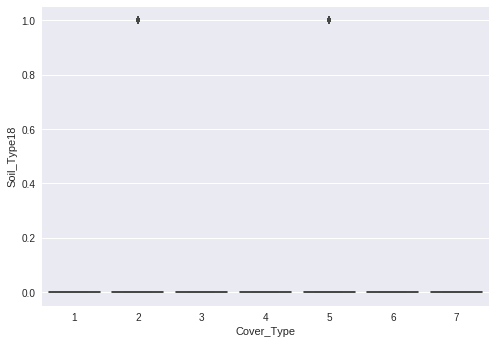

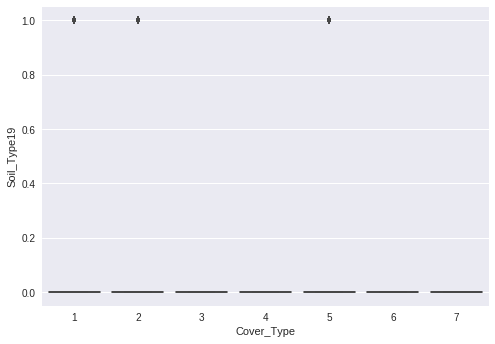

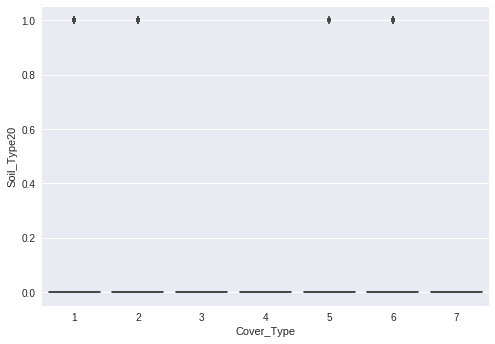

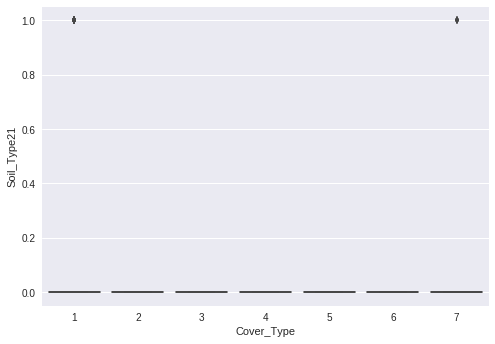

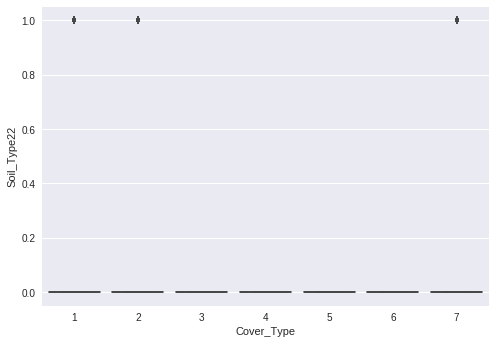

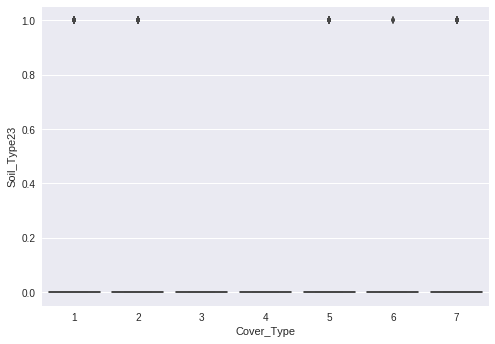

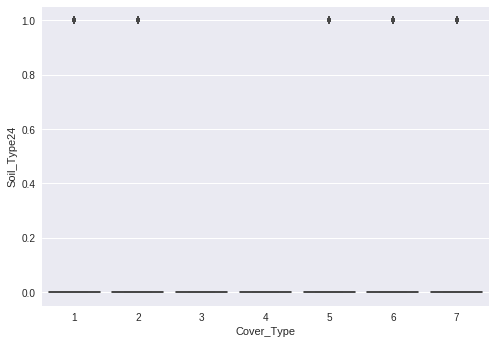

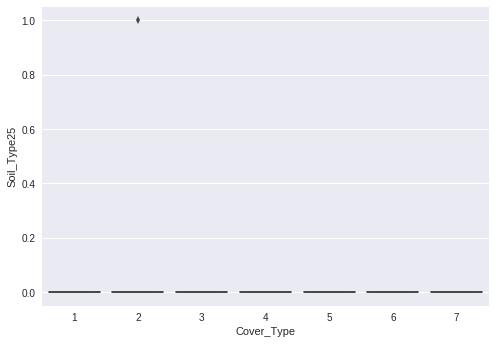

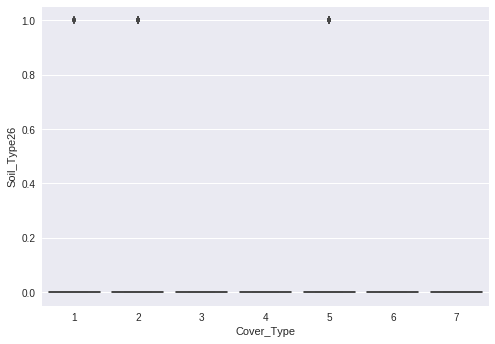

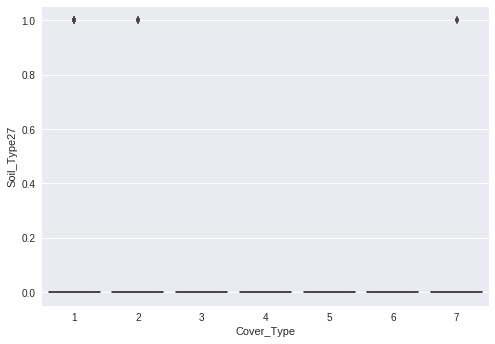

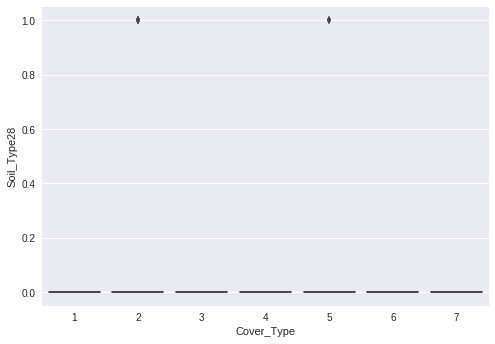

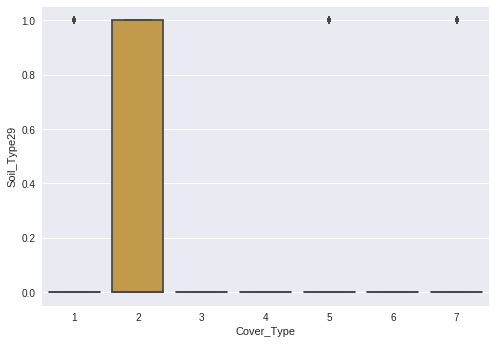

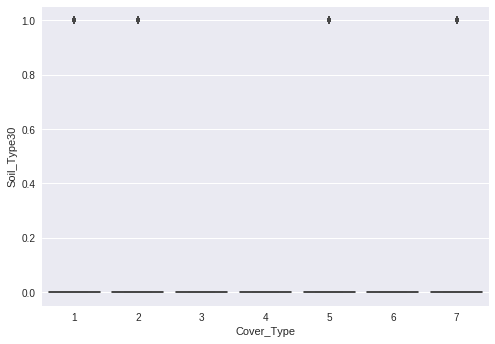

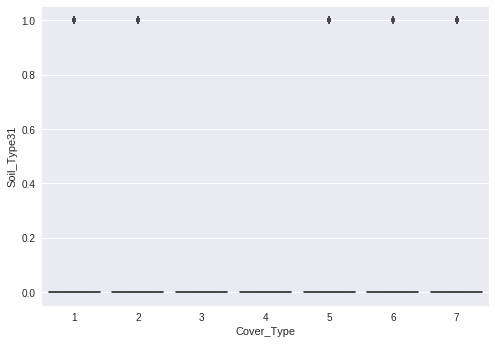

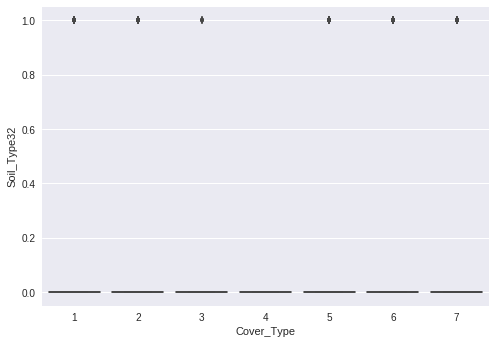

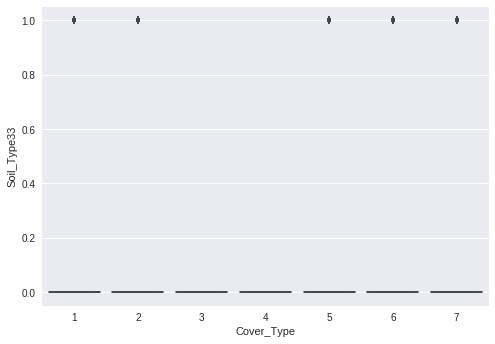

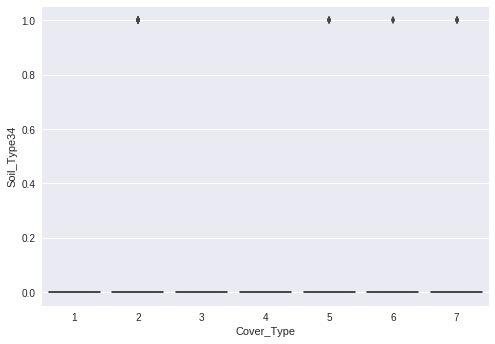

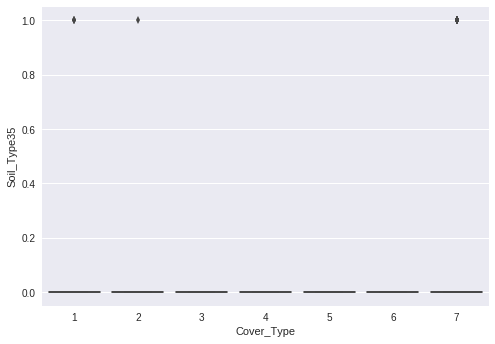

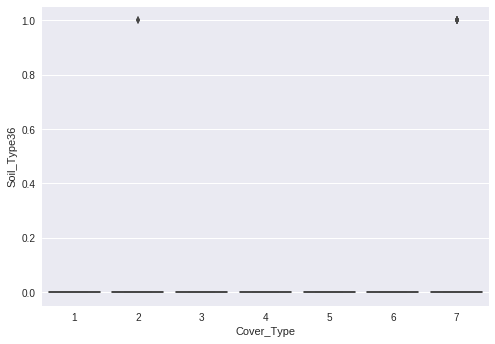

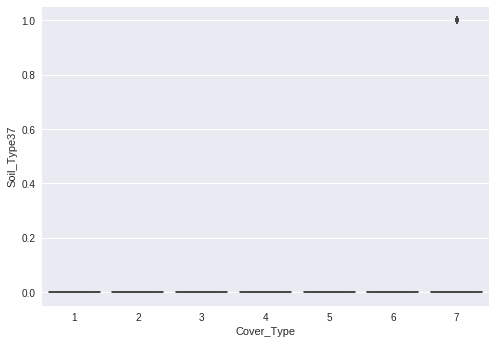

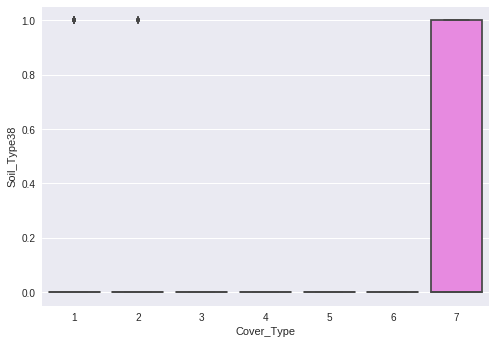

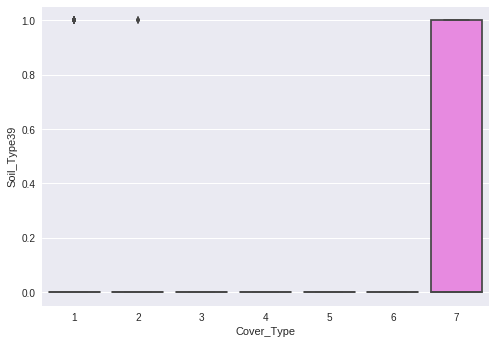

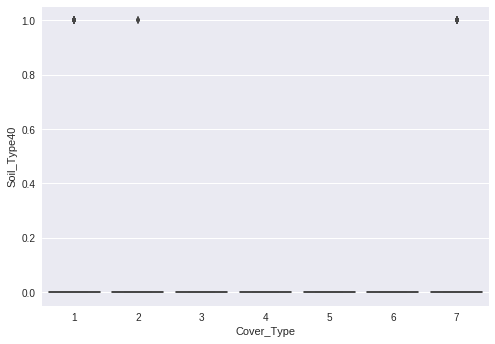

In [109]:
# We will visualize all the attributes using Violin Plot - a combination of box and density plots

#names of all the attributes 
cols = dataset.columns

#number of attributes (exclude target)
size = len(cols)-1

#x-axis has target attribute to distinguish between classes
x = cols[size]

#y-axis shows values of an attribute
y = cols[0:size]

#Plot violin for all attributes
for i in range(0,size):
    sns.boxplot(data=dataset,x=x,y=y[i])  
    plt.show()


In [14]:
# Group one-hot encoded variables of a category into one single variable

#names of all the columns
cols = dataset.columns

#number of rows=r , number of columns=c
r,c = dataset.shape

#Create a new dataframe with r rows, one column for each encoded category, and target in the end
data = pd.DataFrame(index=np.arange(0, r),columns=['Wilderness_Area','Soil_Type','Cover_Type'])

In [15]:
data.head()
r
cols

Index([u'Elevation', u'Aspect', u'Slope', u'Horizontal_Distance_To_Hydrology',
       u'Vertical_Distance_To_Hydrology', u'Horizontal_Distance_To_Roadways',
       u'Hillshade_9am', u'Hillshade_Noon', u'Hillshade_3pm',
       u'Horizontal_Distance_To_Fire_Points', u'Wilderness_Area1',
       u'Wilderness_Area2', u'Wilderness_Area3', u'Wilderness_Area4',
       u'Soil_Type1', u'Soil_Type2', u'Soil_Type3', u'Soil_Type4',
       u'Soil_Type5', u'Soil_Type6', u'Soil_Type7', u'Soil_Type8',
       u'Soil_Type9', u'Soil_Type10', u'Soil_Type11', u'Soil_Type12',
       u'Soil_Type13', u'Soil_Type14', u'Soil_Type15', u'Soil_Type16',
       u'Soil_Type17', u'Soil_Type18', u'Soil_Type19', u'Soil_Type20',
       u'Soil_Type21', u'Soil_Type22', u'Soil_Type23', u'Soil_Type24',
       u'Soil_Type25', u'Soil_Type26', u'Soil_Type27', u'Soil_Type28',
       u'Soil_Type29', u'Soil_Type30', u'Soil_Type31', u'Soil_Type32',
       u'Soil_Type33', u'Soil_Type34', u'Soil_Type35', u'Soil_Type36',
       u'Soil_

In [16]:
#Make an entry in 'data' for each r as category_id, target value
for i in range(0,r):
    w=0;
    s=0;
    # Category1 range
    for j in range(10,14):
        if (dataset.iloc[i,j] == 1):
            w=j-9  #category class
            break
    # Category2 range        
    for k in range(14,54):
        if (dataset.iloc[i,k] == 1):
            s=k-13 #category class
            break
    #Make an entry in 'data' for each r as category_id, target value        
    data.iloc[i]=[w,s,dataset.iloc[i,c-1]]


In [17]:
dataset.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points     ...      Soil_Type32  Soil_Type33  \
0                                6279     ...                0            0   
1                                6225     ...                0            0   
2                                6121     ...                0            0   
3                                6211     ...                0            0   
4                                6172     ...                0            0   

   Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type39  Soil_Type40  Cover_Type  
0            0            0           5  
1            0            0           5  
2            0            0           2  
3            0            0           2  
4            0            0           5  

[5 rows x 55 columns]

In [18]:
dataset.iloc[3,0]

2785

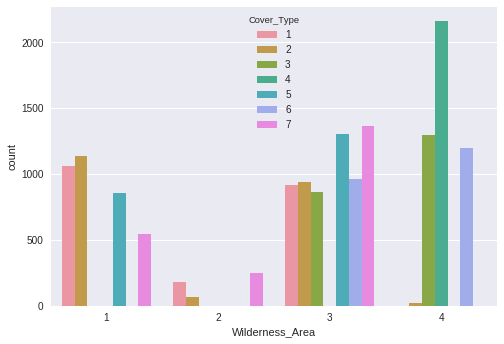

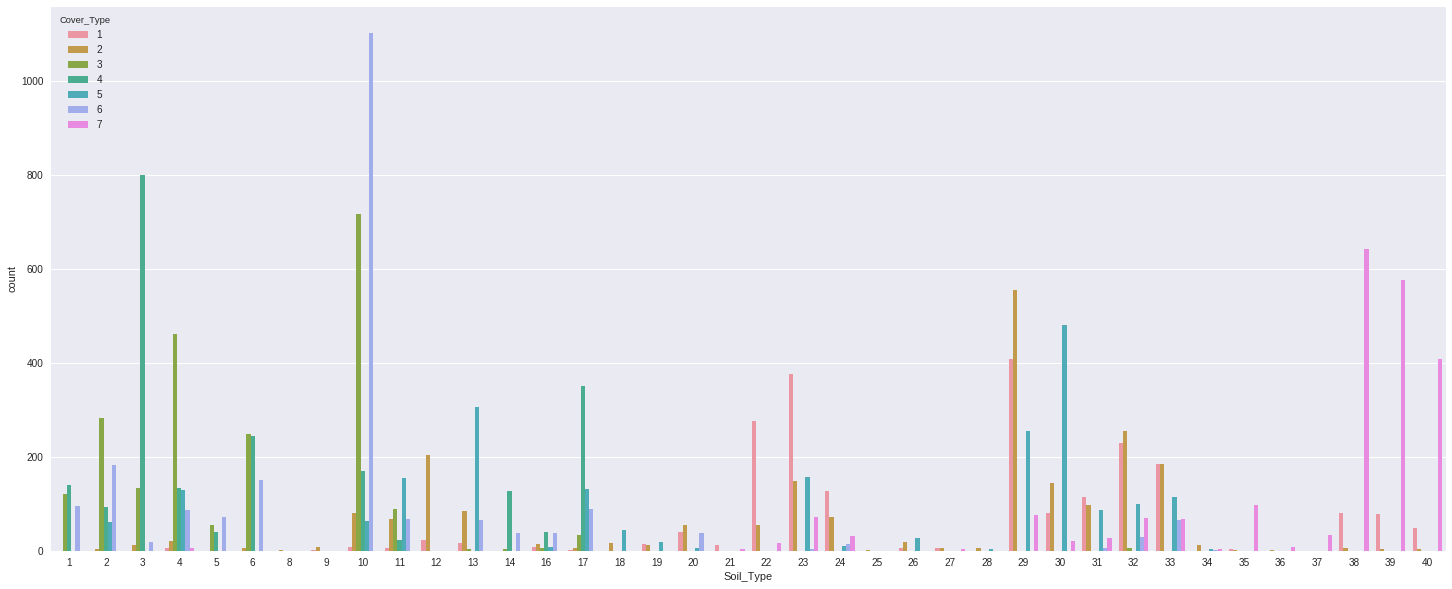

In [19]:
#Plot for Category1    
sns.countplot(x="Wilderness_Area", hue="Cover_Type", data=data)
plt.show()
#Plot for Category2
plt.rc("figure", figsize=(25, 10))
sns.countplot(x="Soil_Type", hue="Cover_Type", data=data)
plt.show()

In [20]:
#Removal list initialize
rem = []

#Add constant columns as they don't help in prediction process
for c in dataset.columns:
    if dataset[c].std() == 0: #standard deviation is zero
        rem.append(c)

#drop the columns        
dataset.drop(rem,axis=1,inplace=True)

print(rem)


['Soil_Type7', 'Soil_Type15']


In [21]:
array = dataset.values


In [159]:
array

array([[2596,   51,    3, ...,    0,    0,    5],
       [2590,   56,    2, ...,    0,    0,    5],
       [2804,  139,    9, ...,    0,    0,    2],
       ..., 
       [2492,  134,   25, ...,    0,    0,    3],
       [2487,  167,   28, ...,    0,    0,    3],
       [2475,  197,   34, ...,    0,    0,    3]])

In [22]:
#get the number of rows and columns
r, c = dataset.shape

#get the list of columns
cols = dataset.columns
#create an array which has indexes of columns
i_cols = []
for i in range(0,c-1):
    i_cols.append(i)
#array of importance rank of all features  
ranks = []

#Extract only the values
array = dataset.values

#Y is the target column, X has the rest
X = array[:,0:(c-1)]
Y = array[:,(c-1)]

#Validation chunk size
val_size = 0.1

#Use a common seed in all experiments so that same chunk is used for validation
seed = 0

#Split the data into chunks
from sklearn import cross_validation
X_train, X_val, Y_train, Y_val = cross_validation.train_test_split(X, Y, test_size=val_size, random_state=seed)

In [23]:
#All features
X_all = []
#Additionally we will make a list of subsets
X_all_add =[]

#columns to be dropped
rem = []
#indexes of columns to be dropped
i_rem = []

#List of combinations
comb = []
comb.append("All+1.0")

#Add this version of X to the list 
X_all.append(['Orig','All', X_train,X_val,1.0,cols[:c-1],rem,ranks,i_cols,i_rem])


In [24]:
#Import libraries for data transformations
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer


In [25]:
#Standardized
#Apply transform only for non-categorical data
X_temp = StandardScaler().fit_transform(X_train[:,0:size])
X_val_temp = StandardScaler().fit_transform(X_val[:,0:size])
#Concatenate non-categorical data and categorical
X_con = np.concatenate((X_temp,X_train[:,size:]),axis=1)
X_val_con = np.concatenate((X_val_temp,X_val[:,size:]),axis=1)
#Add this version of X to the list 
X_all.append(['StdSca','All', X_con,X_val_con,1.0,cols,rem,ranks,i_cols,i_rem])

In [26]:
X_temp


array([[ 0.52404801, -0.84620659,  0.64537029, ..., -1.30712734,
        -1.25954936, -0.83411997],
       [-0.94218759, -0.8007878 ,  0.64537029, ..., -1.17593062,
        -1.28128914, -0.54529602],
       [-0.51812926, -0.93704416, -1.24706459, ...,  0.35469778,
         0.06657728,  0.84672575],
       ..., 
       [ 1.83455597,  0.00766659,  1.23675618, ...,  0.57335898,
        -0.62909571, -0.33324805],
       [-0.41750525, -0.70086647,  2.18297362, ..., -2.7940235 ,
        -2.65089533, -0.38443204],
       [-0.02698825,  1.33389514, -0.89223305, ...,  0.74828793,
         0.97964808, -0.70615999]])

In [169]:
X_train

array([[2968,   64,   22, ...,    0,    0,    0],
       [2356,   69,   22, ...,    0,    0,    0],
       [2533,   54,    6, ...,    0,    0,    0],
       ..., 
       [3515,  158,   27, ...,    0,    0,    0],
       [2575,   80,   35, ...,    0,    0,    0],
       [2738,  304,    9, ...,    0,    0,    0]])

In [27]:
X_temp = MinMaxScaler().fit_transform(X_train[:,0:size])

In [28]:
X_temp

array([[ 0.55639476,  0.17777778,  0.42307692, ...,  0.58064516,
         0.31048387,  0.08465608],
       [ 0.24823766,  0.19166667,  0.42307692, ...,  0.6       ,
         0.30645161,  0.12984413],
       [ 0.33736153,  0.15      ,  0.11538462, ...,  0.82580645,
         0.55645161,  0.34763335],
       ..., 
       [ 0.83182276,  0.43888889,  0.51923077, ...,  0.85806452,
         0.42741935,  0.16302016],
       [ 0.35850957,  0.22222222,  0.67307692, ...,  0.36129032,
         0.05241935,  0.15501216],
       [ 0.44058409,  0.84444444,  0.17307692, ...,  0.88387097,
         0.72580645,  0.1046761 ]])

In [29]:
X_con

array([[ 0.52404801, -0.84620659,  0.64537029, ...,  0.        ,
         0.        ,  0.        ],
       [-0.94218759, -0.8007878 ,  0.64537029, ...,  0.        ,
         0.        ,  0.        ],
       [-0.51812926, -0.93704416, -1.24706459, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 1.83455597,  0.00766659,  1.23675618, ...,  0.        ,
         0.        ,  0.        ],
       [-0.41750525, -0.70086647,  2.18297362, ...,  0.        ,
         0.        ,  0.        ],
       [-0.02698825,  1.33389514, -0.89223305, ...,  0.        ,
         0.        ,  0.        ]])

In [30]:
#MinMax
#Apply transform only for non-categorical data
X_temp = MinMaxScaler().fit_transform(X_train[:,0:size])
X_val_temp = MinMaxScaler().fit_transform(X_val[:,0:size])
#Concatenate non-categorical data and categorical
X_con = np.concatenate((X_temp,X_train[:,size:]),axis=1)
X_val_con = np.concatenate((X_val_temp,X_val[:,size:]),axis=1)
#Add this version of X to the list 
X_all.append(['MinMax', 'All', X_con,X_val_con,1.0,cols,rem,ranks,i_cols,i_rem])
X_con

array([[ 0.55639476,  0.17777778,  0.42307692, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.24823766,  0.19166667,  0.42307692, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.33736153,  0.15      ,  0.11538462, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.83182276,  0.43888889,  0.51923077, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.35850957,  0.22222222,  0.67307692, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.44058409,  0.84444444,  0.17307692, ...,  0.        ,
         0.        ,  0.        ]])

In [31]:
#Normalize
#Apply transform only for non-categorical data
X_temp = Normalizer().fit_transform(X_train[:,0:size])
X_val_temp = Normalizer().fit_transform(X_val[:,0:size])
#Concatenate non-categorical data and categorical
X_con = np.concatenate((X_temp,X_train[:,size:]),axis=1)
X_val_con = np.concatenate((X_val_temp,X_val[:,size:]),axis=1)
#Add this version of X to the list 
X_all.append(['Norm', 'All', X_con,X_val_con,1.0,cols,rem,ranks,i_cols,i_rem])
X_con

array([[ 0.95407868,  0.02057313,  0.00707201, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.88986326,  0.02606136,  0.00830942, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.5851634 ,  0.01247486,  0.0013861 , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.71463822,  0.03212314,  0.0054894 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78660435,  0.02443819,  0.01069171, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78836571,  0.0875322 ,  0.00259141, ...,  0.        ,
         0.        ,  0.        ]])

In [32]:
import numpy as numpy
#All features
X_all = []
#Additionally we will make a list of subsets
X_all_add =[]

#columns to be dropped
rem = []
#indexes of columns to be dropped
i_rem = []

#List of combinations
comb = []
comb.append("All+1.0")

#Add this version of X to the list 
X_all.append(['Orig','All', X_train,X_val,1.0,cols[:c-1],rem,ranks,i_cols,i_rem])

#point where categorical data begins
size=10

#Standardized
#Apply transform only for non-categorical data
X_temp = StandardScaler().fit_transform(X_train[:,0:size])
X_val_temp = StandardScaler().fit_transform(X_val[:,0:size])
#Concatenate non-categorical data and categorical
X_con = numpy.concatenate((X_temp,X_train[:,size:]),axis=1)
X_val_con = numpy.concatenate((X_val_temp,X_val[:,size:]),axis=1)
#Add this version of X to the list 
X_all.append(['StdSca','All', X_con,X_val_con,1.0,cols,rem,ranks,i_cols,i_rem])

#MinMax
#Apply transform only for non-categorical data
X_temp = MinMaxScaler().fit_transform(X_train[:,0:size])
X_val_temp = MinMaxScaler().fit_transform(X_val[:,0:size])
#Concatenate non-categorical data and categorical
X_con = numpy.concatenate((X_temp,X_train[:,size:]),axis=1)
X_val_con = numpy.concatenate((X_val_temp,X_val[:,size:]),axis=1)
#Add this version of X to the list 
X_all.append(['MinMax', 'All', X_con,X_val_con,1.0,cols,rem,ranks,i_cols,i_rem])

#Normalize
#Apply transform only for non-categorical data
X_temp = Normalizer().fit_transform(X_train[:,0:size])
X_val_temp = Normalizer().fit_transform(X_val[:,0:size])
#Concatenate non-categorical data and categorical
X_con = numpy.concatenate((X_temp,X_train[:,size:]),axis=1)
X_val_con = numpy.concatenate((X_val_temp,X_val[:,size:]),axis=1)
#Add this version of X to the list 
X_all.append(['Norm', 'All', X_con,X_val_con,1.0,cols,rem,ranks,i_cols,i_rem])

In [33]:
X_all

[['Orig', 'All', array([[2968,   64,   22, ...,    0,    0,    0],
         [2356,   69,   22, ...,    0,    0,    0],
         [2533,   54,    6, ...,    0,    0,    0],
         ..., 
         [3515,  158,   27, ...,    0,    0,    0],
         [2575,   80,   35, ...,    0,    0,    0],
         [2738,  304,    9, ...,    0,    0,    0]]), array([[2220,   18,   12, ...,    0,    0,    0],
         [2139,  119,   10, ...,    0,    0,    0],
         [2292,  109,   26, ...,    0,    0,    0],
         ..., 
         [2396,  102,   13, ...,    0,    0,    0],
         [2372,   76,   19, ...,    0,    0,    0],
         [2354,  313,   23, ...,    0,    0,    0]]), 1.0, Index([u'Elevation', u'Aspect', u'Slope', u'Horizontal_Distance_To_Hydrology',
         u'Vertical_Distance_To_Hydrology', u'Horizontal_Distance_To_Roadways',
         u'Hillshade_9am', u'Hillshade_Noon', u'Hillshade_3pm',
         u'Horizontal_Distance_To_Fire_Points', u'Wilderness_Area1',
         u'Wilderness_Area2', u'

In [34]:
trans_list = []

for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all:
    trans_list.append(trans)

In [35]:
trans_list

['Orig', 'StdSca', 'MinMax', 'Norm']

In [36]:
#List of feature selection models
feat = []

#List of names of feature selection models
feat_list =[]

#Import the libraries
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [39]:
ratio_list = [0.75,0.50,0.25]

In [150]:
#Add ExtraTreeClassifiers to the list
n = 'ExTree'
feat_list.append(n)
for val in ratio_list:
    comb.append("%s+%s" % (n,val))
    feat.append([n,val,ExtraTreesClassifier(n_estimators=c-1,max_features=val,n_jobs=-1,random_state=seed)])      

#Add GradientBoostingClassifiers to the list 
n = 'GraBst'
feat_list.append(n)
for val in ratio_list:
    comb.append("%s+%s" % (n,val))
    feat.append([n,val,GradientBoostingClassifier(n_estimators=c-1,max_features=val,random_state=seed)])   

#Add RandomForestClassifiers to the list 
n = 'RndFst'
feat_list.append(n)
for val in ratio_list:
    comb.append("%s+%s" % (n,val))
    feat.append([n,val,RandomForestClassifier(n_estimators=c-1,max_features=val,n_jobs=-1,random_state=seed)])   

#Add XGBClassifier to the list 
n = 'XGB'
feat_list.append(n)
for val in ratio_list:
    comb.append("%s+%s" % (n,val))
    feat.append([n,val,XGBClassifier(n_estimators=c-1,seed=seed)])   

In [44]:
X_all

[['Orig', 'All', array([[2968,   64,   22, ...,    0,    0,    0],
         [2356,   69,   22, ...,    0,    0,    0],
         [2533,   54,    6, ...,    0,    0,    0],
         ..., 
         [3515,  158,   27, ...,    0,    0,    0],
         [2575,   80,   35, ...,    0,    0,    0],
         [2738,  304,    9, ...,    0,    0,    0]]), array([[2220,   18,   12, ...,    0,    0,    0],
         [2139,  119,   10, ...,    0,    0,    0],
         [2292,  109,   26, ...,    0,    0,    0],
         ..., 
         [2396,  102,   13, ...,    0,    0,    0],
         [2372,   76,   19, ...,    0,    0,    0],
         [2354,  313,   23, ...,    0,    0,    0]]), 1.0, Index([u'Elevation', u'Aspect', u'Slope', u'Horizontal_Distance_To_Hydrology',
         u'Vertical_Distance_To_Hydrology', u'Horizontal_Distance_To_Roadways',
         u'Hillshade_9am', u'Hillshade_Noon', u'Hillshade_3pm',
         u'Horizontal_Distance_To_Fire_Points', u'Wilderness_Area1',
         u'Wilderness_Area2', u'

In [151]:
#For all transformations of X
for trans,s, X, X_val, d, cols, rem, ra, i_cols, i_rem in X_all:
    #For all feature selection models
    for name,v, model in feat:
        #Train the model against Y
        model.fit(X,Y_train)
        #Combine importance and index of the column in the array joined
        joined = []
        for i, pred in enumerate(list(model.feature_importances_)):
            joined.append([i,cols[i],pred])
        #Sort in descending order    
        joined_sorted = sorted(joined, key=lambda x: -x[2])
        #Starting point of the columns to be dropped
        rem_start = int((v*(c-1)))
        #List of names of columns selected
        cols_list = []
        #Indexes of columns selected
        i_cols_list = []
        #Ranking of all the columns
        rank_list =[]
        #List of columns not selected
        rem_list = []
        #Indexes of columns not selected
        i_rem_list = []
        #Split the array. Store selected columns in cols_list and removed in rem_list
        for j, (i, col, x) in enumerate(list(joined_sorted)):
            #Store the rank
            rank_list.append([i,j])
            #Store selected columns in cols_list and indexes in i_cols_list
            if(j < rem_start):
                cols_list.append(col)
                i_cols_list.append(i)
            #Store not selected columns in rem_list and indexes in i_rem_list    
            else:
                rem_list.append(col)
                i_rem_list.append(i)    
        #Sort the rank_list and store only the ranks. Drop the index 
        #Append model name, array, columns selected and columns to be removed to the additional list        
        X_all_add.append([trans,name,X,X_val,v,cols_list,rem_list,[x[1] for x in sorted(rank_list,key=lambda x:x[0])],i_cols_list,i_rem_list]) 

ValueError: need more than 2 values to unpack

In [155]:
x[1] for x in sorted(rank_list,key=lambda x:x[0])


TypeError: 'int' object has no attribute '__getitem__'

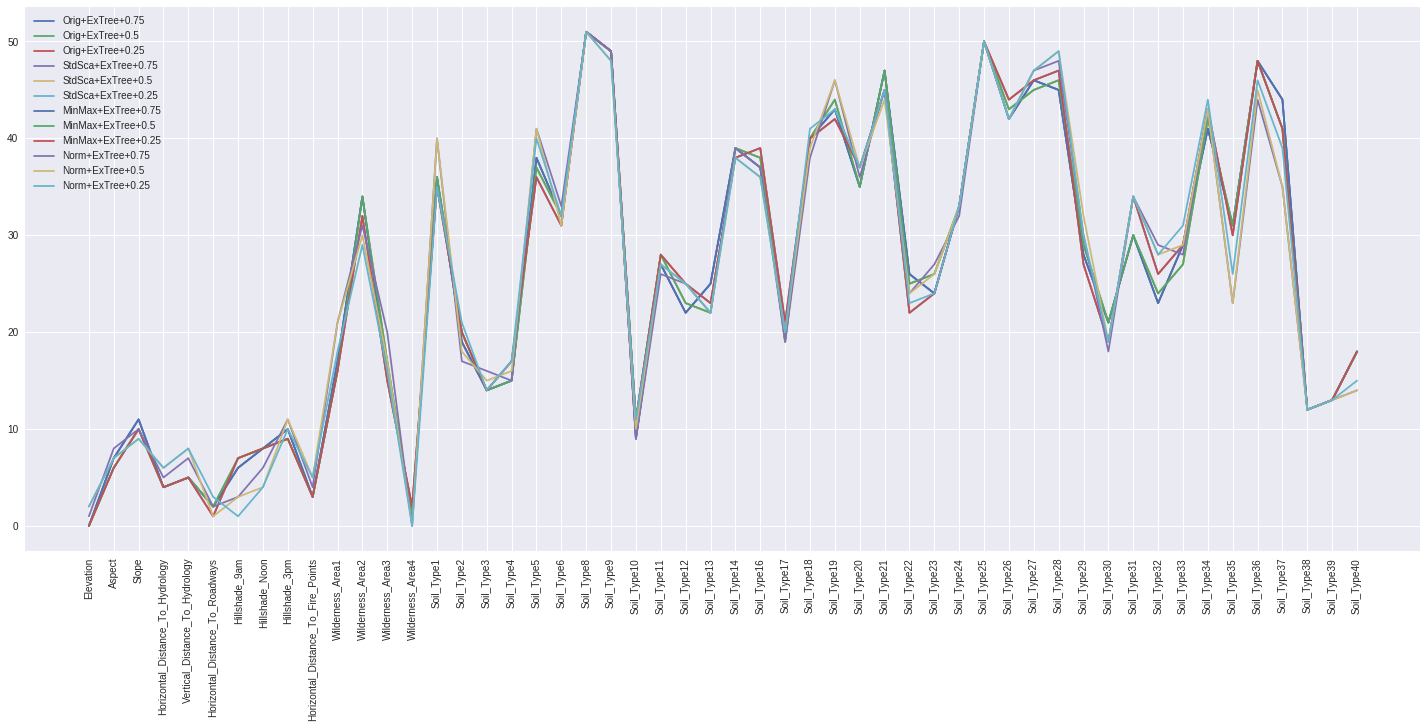

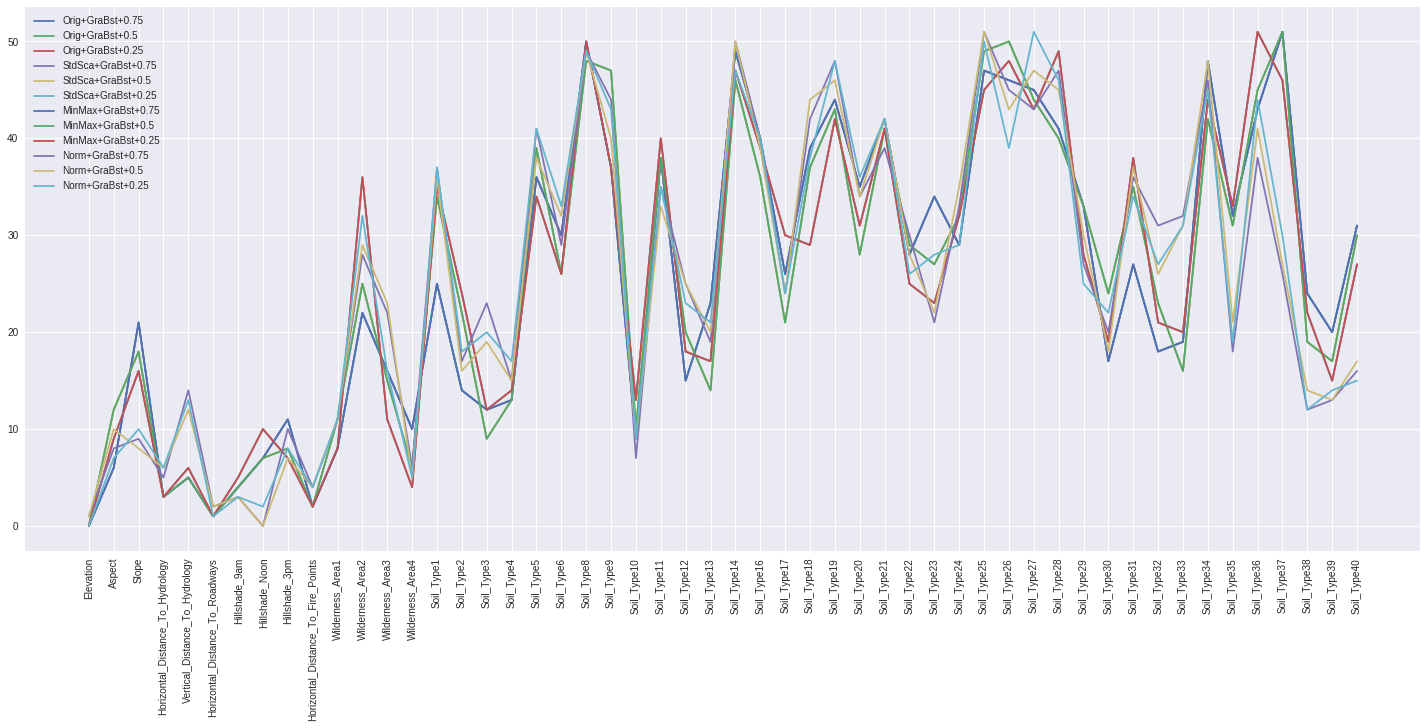

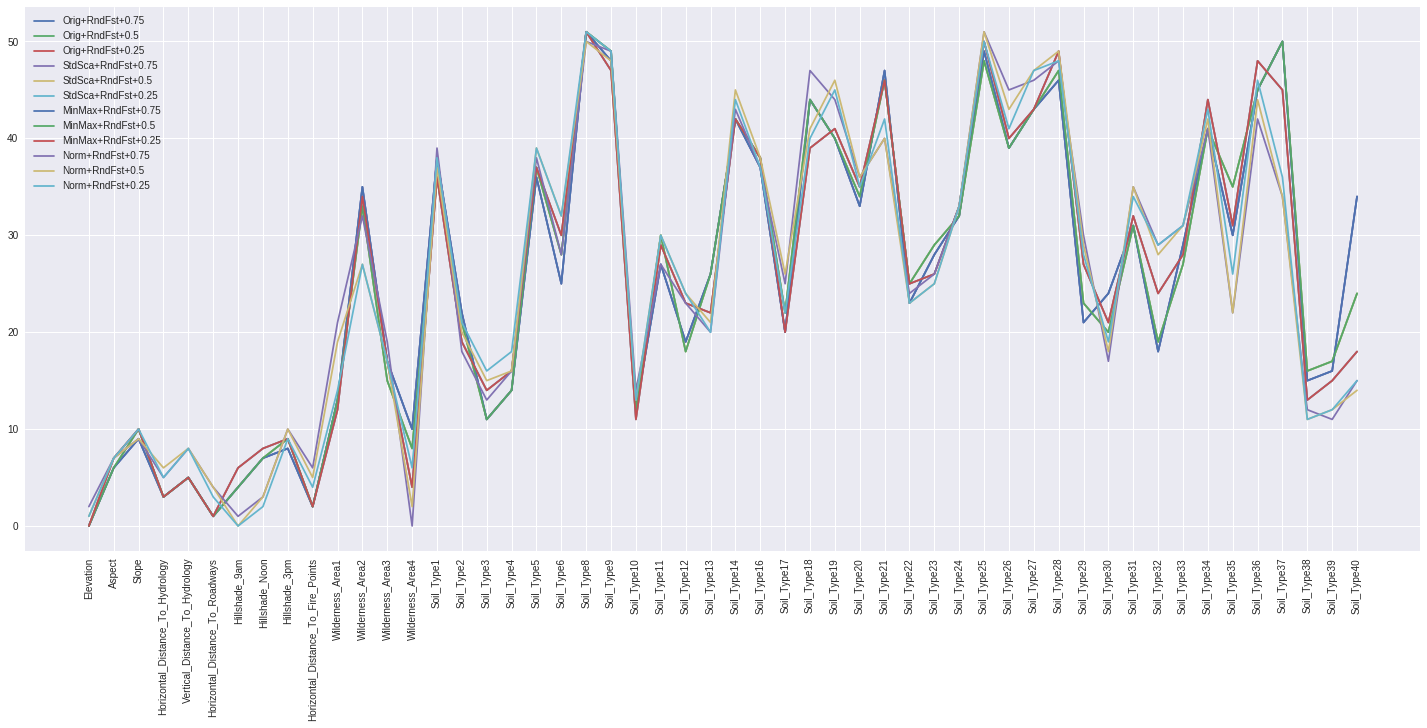

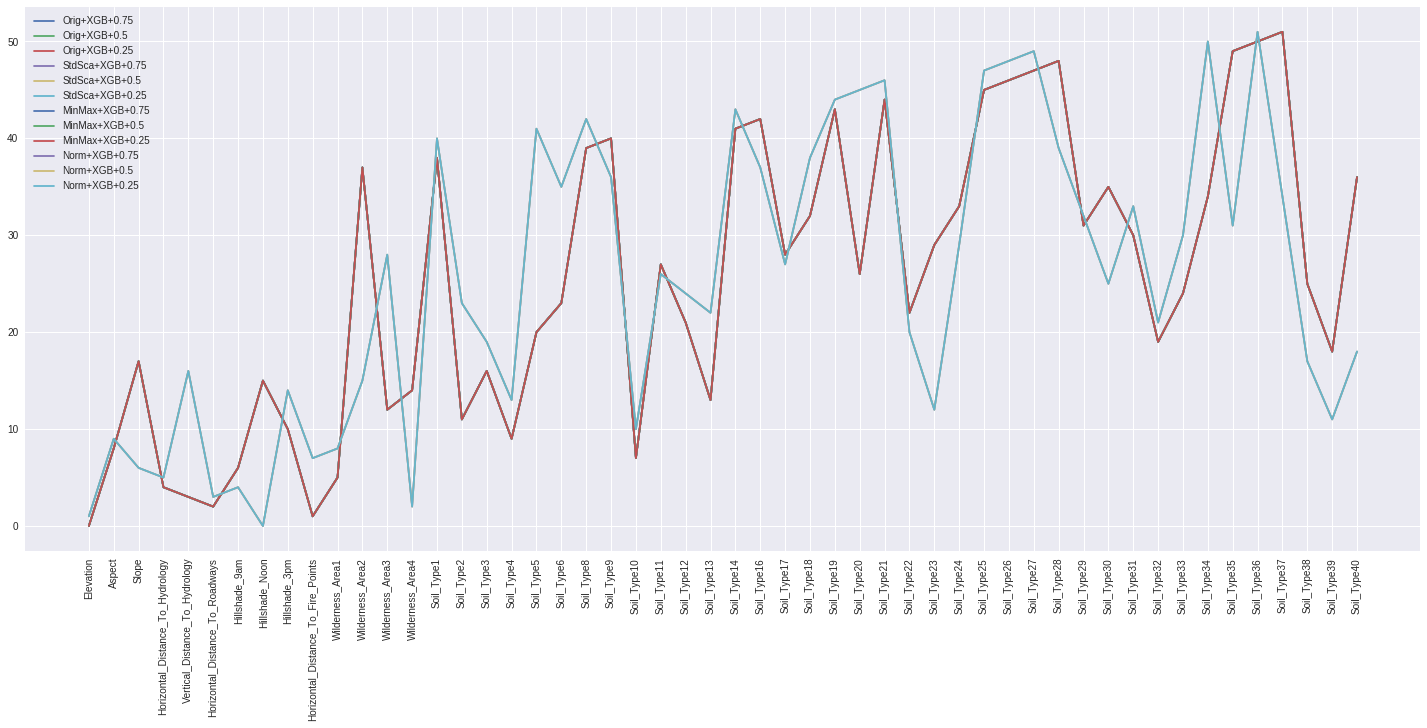

In [52]:
#Plot a graph for different feature selectors        
for f_name in feat_list:
    #Array to store the list of combinations
    leg=[]
    fig, ax = plt.subplots()
    #Plot each combination
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
        if(name==f_name):
            plt.plot(rank_list)
            leg.append(trans+"+"+name+"+%s"% v)
    #Set the tick names to names of columns
    ax.set_xticks(range(c-1))
    ax.set_xticklabels(cols[:c-1],rotation='vertical')
    #Display the plot
    plt.legend(leg,loc='best')    
    #Plot the rankings of all the features for all combinations
    plt.show()


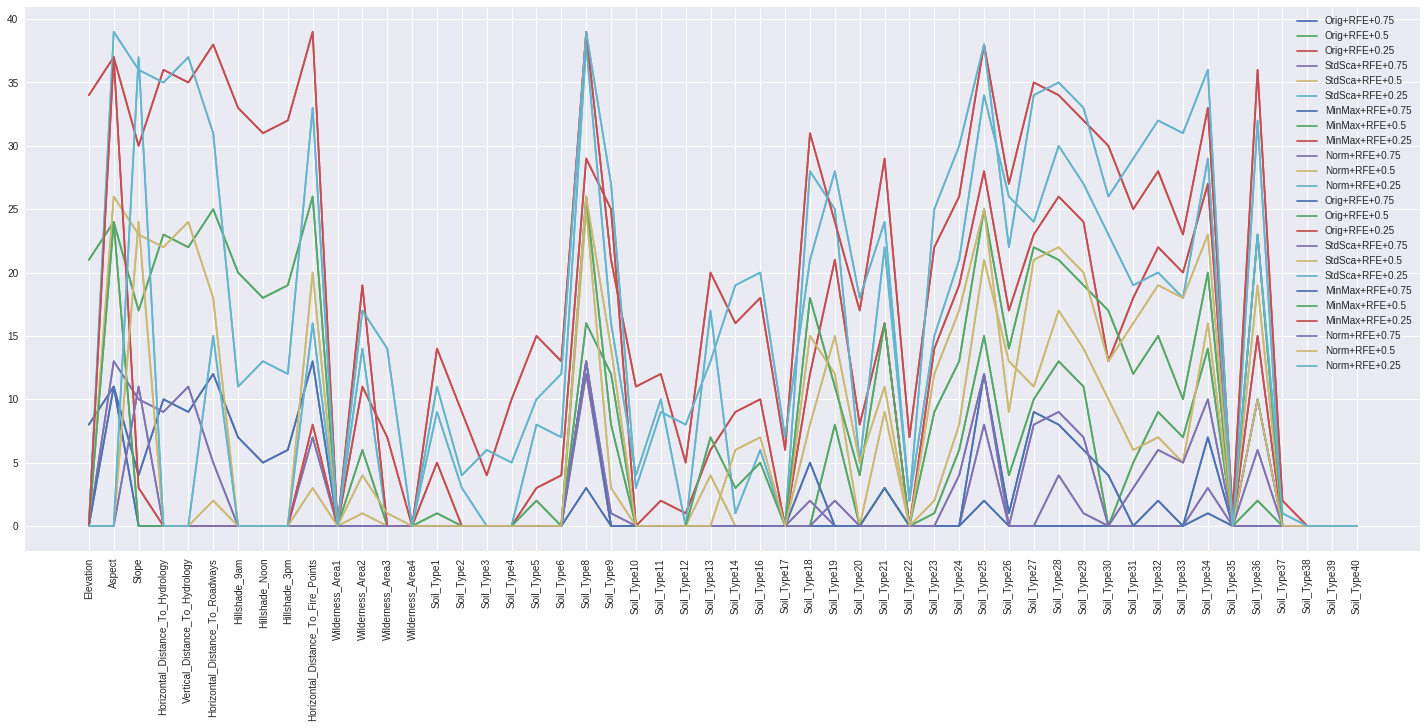

In [55]:
#List of feature selection models
feat = []

#List of names of feature selection models
feat_list =[]

#Libraries for feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#Add RFE to the list 
model = LogisticRegression(random_state=seed,n_jobs=-1)
n = 'RFE'
feat_list.append(n)
for val in ratio_list:
    comb.append("%s+%s" % (n,val))
    feat.append([n,val,RFE(model,val*(c-1))])   
        
#For all transformations of X
for trans,s, X, X_val, d, cols, rem, ra, i_cols, i_rem in X_all:
    #For all feature selection models
    for name,v, model in feat:
        #Train the model against Y
        model.fit(X,Y_train)
        #Combine importance and index of the column in the array joined
        joined = []
        for i, pred in enumerate(list(model.ranking_)):
            joined.append([i,cols[i],pred])
        #Sort in ascending order    
        joined_sorted = sorted(joined, key=lambda x: x[2])
        #Starting point of the columns to be dropped
        rem_start = int((v*(c-1)))
        #List of names of columns selected
        cols_list = []
        #Indexes of columns selected
        i_cols_list = []
        #Ranking of all the columns
        rank_list =[]
        #List of columns not selected
        rem_list = []
        #Indexes of columns not selected
        i_rem_list = []
        #Split the array. Store selected columns in cols_list and removed in rem_list
        for i, col, j in joined_sorted:
            #Store the rank
            rank_list.append([i,j-1])
            #Store selected columns in cols_list and indexes in i_cols_list
            if((j-1) < rem_start):
                cols_list.append(col)
                i_cols_list.append(i)
            #Store not selected columns in rem_list and indexes in i_rem_list    
            else:
                rem_list.append(col)
                i_rem_list.append(i)    
        #Sort the rank_list and store only the ranks. Drop the index 
        #Append model name, array, columns selected and columns to be removed to the additional list        
        X_all_add.append([trans,name,X,X_val,v,cols_list,rem_list,[x[1] for x in sorted(rank_list,key=lambda x:x[0])],i_cols_list,i_rem_list])    

#Set figure size
plt.rc("figure", figsize=(25, 10))

#Plot a graph for different feature selectors        
for f_name in feat_list:
    #Array to store the list of combinations
    leg=[]
    fig, ax = plt.subplots()
    #Plot each combination
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
        if(name==f_name):
            plt.plot(rank_list)
            leg.append(trans+"+"+name+"+%s"% v)
    #Set the tick names to names of columns
    ax.set_xticks(range(c-1))
    ax.set_xticklabels(cols[:c-1],rotation='vertical')
    #Display the plot
    plt.legend(leg,loc='best')    
    #Plot the rankings of all the features for all combinations
    plt.show()


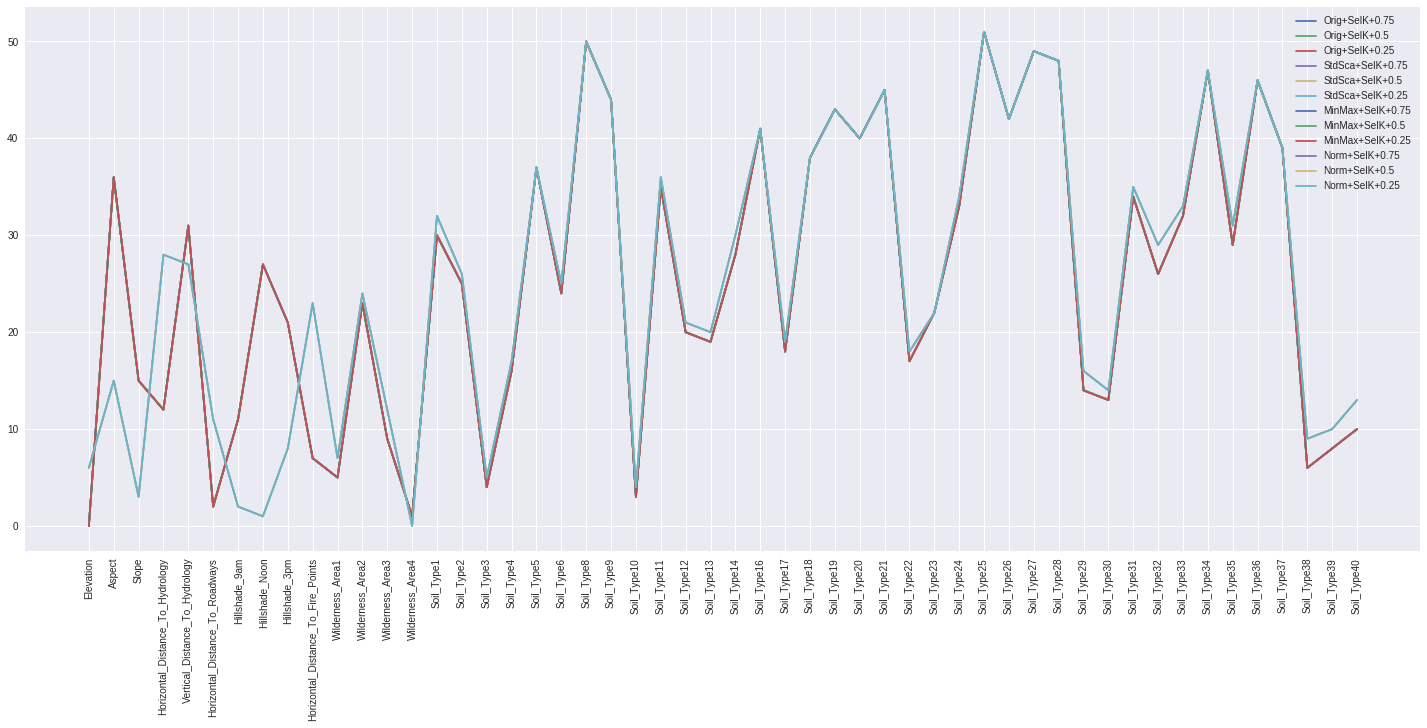

In [56]:
#List of feature selection models
feat = []

#List of names of feature selection models
feat_list =[]

#Libraries for SelectPercentile    
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif        

n = 'SelK'
feat_list.append(n)
for val in ratio_list:
    comb.append("%s+%s" % (n,val))
    feat.append([n,val,SelectPercentile(score_func=f_classif,percentile=val*100)])   

#For all transformations of X
for trans,s, X, X_val, d, cols, rem, ra, i_cols, i_rem in X_all:
    #For all feature selection models
    for name,v, model in feat:
        #Train the model against Y
        model.fit(X,Y_train)
        #Combine importance and index of the column in the array joined
        joined = []
        for i, pred in enumerate(list(model.scores_)):
            joined.append([i,cols[i],pred])
        #Sort in descending order    
        joined_sorted = sorted(joined, key=lambda x: -x[2])
        #Starting point of the columns to be dropped
        rem_start = int((v*(c-1)))
        #List of names of columns selected
        cols_list = []
        #Indexes of columns selected
        i_cols_list = []
        #Ranking of all the columns
        rank_list =[]
        #List of columns not selected
        rem_list = []
        #Indexes of columns not selected
        i_rem_list = []
        #Split the array. Store selected columns in cols_list and removed in rem_list
        for j, (i, col, x) in enumerate(list(joined_sorted)):
            #Store the rank
            rank_list.append([i,j])
            #Store selected columns in cols_list and indexes in i_cols_list
            if(j < rem_start):
                cols_list.append(col)
                i_cols_list.append(i)
            #Store not selected columns in rem_list and indexes in i_rem_list    
            else:
                rem_list.append(col)
                i_rem_list.append(i)    
        #Sort the rank_list and store only the ranks. Drop the index 
        #Append model name, array, columns selected and columns to be removed to the additional list        
        X_all_add.append([trans,name,X,X_val,v,cols_list,rem_list,[x[1] for x in sorted(rank_list,key=lambda x:x[0])],i_cols_list,i_rem_list])    


#Set figure size
plt.rc("figure", figsize=(25, 10))

#Plot a graph for different feature selectors        
for f_name in feat_list:
    #Array to store the list of combinations
    leg=[]
    fig, ax = plt.subplots()
    #Plot each combination
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
        if(name==f_name):
            plt.plot(rank_list)
            leg.append(trans+"+"+name+"+%s"% v)
    #Set the tick names to names of columns
    ax.set_xticks(range(c-1))
    ax.set_xticklabels(cols[:c-1],rotation='vertical')
    #Display the plot
    plt.legend(leg,loc='best')    
    #Plot the rankings of all the features for all combinations
    plt.show()



In [57]:
X_all_add


[['Orig', 'ExTree', array([[2968,   64,   22, ...,    0,    0,    0],
         [2356,   69,   22, ...,    0,    0,    0],
         [2533,   54,    6, ...,    0,    0,    0],
         ..., 
         [3515,  158,   27, ...,    0,    0,    0],
         [2575,   80,   35, ...,    0,    0,    0],
         [2738,  304,    9, ...,    0,    0,    0]]), array([[2220,   18,   12, ...,    0,    0,    0],
         [2139,  119,   10, ...,    0,    0,    0],
         [2292,  109,   26, ...,    0,    0,    0],
         ..., 
         [2396,  102,   13, ...,    0,    0,    0],
         [2372,   76,   19, ...,    0,    0,    0],
         [2354,  313,   23, ...,    0,    0,    0]]), 0.75, ['Elevation',
   'Wilderness_Area4',
   'Horizontal_Distance_To_Roadways',
   'Horizontal_Distance_To_Fire_Points',
   'Horizontal_Distance_To_Hydrology',
   'Vertical_Distance_To_Hydrology',
   'Hillshade_9am',
   'Aspect',
   'Hillshade_Noon',
   'Soil_Type10',
   'Hillshade_3pm',
   'Slope',
   'Soil_Type38',
   'So

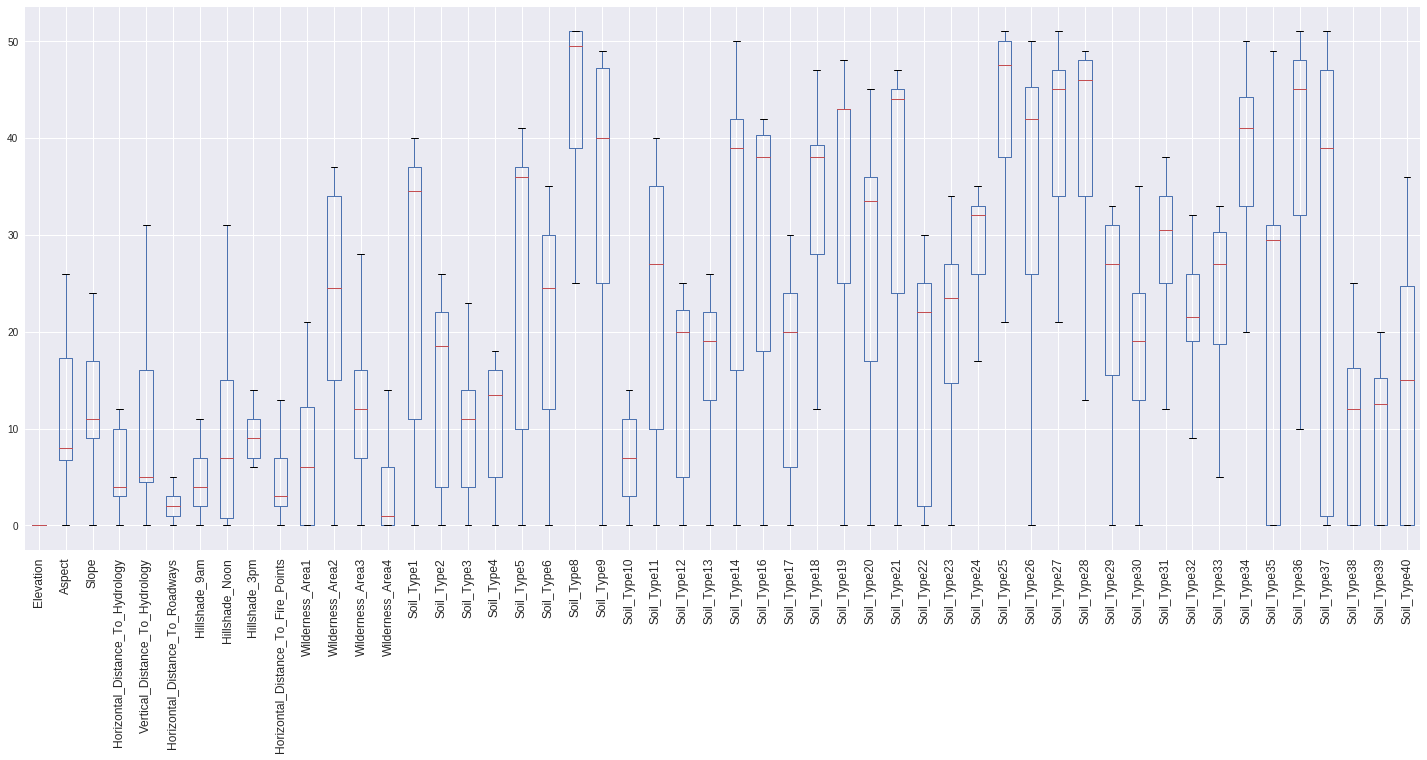

In [59]:
rank_df = pd.DataFrame(data=[x[7] for x in X_all_add],columns=cols[:c-1])
_ = rank_df.boxplot(rot=90)

In [63]:
rank_df = pd.DataFrame(data=[x[7] for x in X_all_add],columns=cols[:c-1])
med = rank_df.median()
print(med)
#Write medians to output file for exploratory study on ML algorithms
with open("median.csv", "w") as subfile:
       subfile.write("Column,Median\n")
       subfile.write(med.to_string())
    

Elevation                              0.0
Aspect                                 8.0
Slope                                 11.0
Horizontal_Distance_To_Hydrology       4.0
Vertical_Distance_To_Hydrology         5.0
Horizontal_Distance_To_Roadways        2.0
Hillshade_9am                          4.0
Hillshade_Noon                         7.0
Hillshade_3pm                          9.0
Horizontal_Distance_To_Fire_Points     3.0
Wilderness_Area1                       6.0
Wilderness_Area2                      24.5
Wilderness_Area3                      12.0
Wilderness_Area4                       1.0
Soil_Type1                            34.5
Soil_Type2                            18.5
Soil_Type3                            11.0
Soil_Type4                            13.5
Soil_Type5                            36.0
Soil_Type6                            24.5
Soil_Type8                            49.5
Soil_Type9                            40.0
Soil_Type10                            7.0
Soil_Type11

In [64]:
import pandas as pandas

In [65]:
#Select top 75%,50%,25%
ratio_list = [0.75,0.50,0.25]

#Median of rankings for each column
unsorted_rank = [0,8,11,4,5,2,5,7.5,9.5,3,8,28.5,14.5,2,35,19.5,12,14,37,25.5,50,44,9,28,20.5,19.5,40,38,20,38,43,35,44,22,24,33,49,42,46,47,27.5,19,31.5,23,28,42,30.5,46,40,12,13,18]

#List of feature selection models
feat = []

#Add Median to the list 
n = 'Median'
for val in ratio_list:
    feat.append([n,val])   

for trans,s, X, X_val, d, cols, rem_cols, ra, i_cols, i_rem in X_all:
    #Create subsets of feature list based on ranking and ratio_list
    for name, v in feat:
        #Combine importance and index of the column in the array joined
        joined = []
        for i, pred in enumerate(unsorted_rank):
            joined.append([i,cols[i],pred])
        #Sort in descending order    
        joined_sorted = sorted(joined, key=lambda x: x[2])
        #Starting point of the columns to be dropped
        rem_start = int((v*(c-1)))
        #List of names of columns selected
        cols_list = []
        #Indexes of columns selected
        i_cols_list = []
        #Ranking of all the columns
        rank_list =[]
        #List of columns not selected
        rem_list = []
        #Indexes of columns not selected
        i_rem_list = []
        #Split the array. Store selected columns in cols_list and removed in rem_list
        for j, (i, col, x) in enumerate(list(joined_sorted)):
            #Store the rank
            rank_list.append([i,j])
            #Store selected columns in cols_list and indexes in i_cols_list
            if(j < rem_start):
                cols_list.append(col)
                i_cols_list.append(i)
            #Store not selected columns in rem_list and indexes in i_rem_list    
            else:
                rem_list.append(col)
                i_rem_list.append(i)    
        #Sort the rank_list and store only the ranks. Drop the index 
        #Append model name, array, columns selected and columns to be removed to the additional list        
        X_all_add.append([trans,name,X,X_val,v,cols_list,rem_list,[x[1] for x in sorted(rank_list,key=lambda x:x[0])],i_cols_list,i_rem_list])

In [66]:


#Import plotting library    
import matplotlib.pyplot as plt    

#Dictionary to store the accuracies for all combinations 
acc = {}

#List of combinations
comb = []

#Append name of transformation to trans_list
for trans in trans_list:
    acc[trans]=[]



In [67]:
#Evaluation of various combinations of LinearDiscriminatAnalysis using all the views

#Import the library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Set the base model
model = LinearDiscriminantAnalysis()
algo = "LDA"

##Set figure size
#plt.rc("figure", figsize=(25, 10))

#Accuracy of the model using all features
for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all:
    model.fit(X[:,i_cols_list],Y_train)
    result = model.score(X_val[:,i_cols_list], Y_val)
    acc[trans].append(result)
    #print(trans+"+"+name+"+%d" % (v*(c-1)))
    #print(result)
comb.append("%s+%s of %s" % (algo,"All",1.0))
        
#Accuracy of the model using a subset of features    
for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
    model.fit(X[:,i_cols_list],Y_train)
    result = model.score(X_val[:,i_cols_list], Y_val)
    acc[trans].append(result)
    #print(trans+"+"+name+"+%d" % (v*(c-1)))
    #print(result)
for v in ratio_list:
    comb.append("%s+%s of %s" % (algo,"Subset",v))

In [96]:
X_all_add

[['Orig', 'ExTree', array([[2968,   64,   22, ...,    0,    0,    0],
         [2356,   69,   22, ...,    0,    0,    0],
         [2533,   54,    6, ...,    0,    0,    0],
         ..., 
         [3515,  158,   27, ...,    0,    0,    0],
         [2575,   80,   35, ...,    0,    0,    0],
         [2738,  304,    9, ...,    0,    0,    0]]), array([[2220,   18,   12, ...,    0,    0,    0],
         [2139,  119,   10, ...,    0,    0,    0],
         [2292,  109,   26, ...,    0,    0,    0],
         ..., 
         [2396,  102,   13, ...,    0,    0,    0],
         [2372,   76,   19, ...,    0,    0,    0],
         [2354,  313,   23, ...,    0,    0,    0]]), 0.75, ['Elevation',
   'Wilderness_Area4',
   'Horizontal_Distance_To_Roadways',
   'Horizontal_Distance_To_Fire_Points',
   'Horizontal_Distance_To_Hydrology',
   'Vertical_Distance_To_Hydrology',
   'Hillshade_9am',
   'Aspect',
   'Hillshade_Noon',
   'Soil_Type10',
   'Hillshade_3pm',
   'Slope',
   'Soil_Type38',
   'So

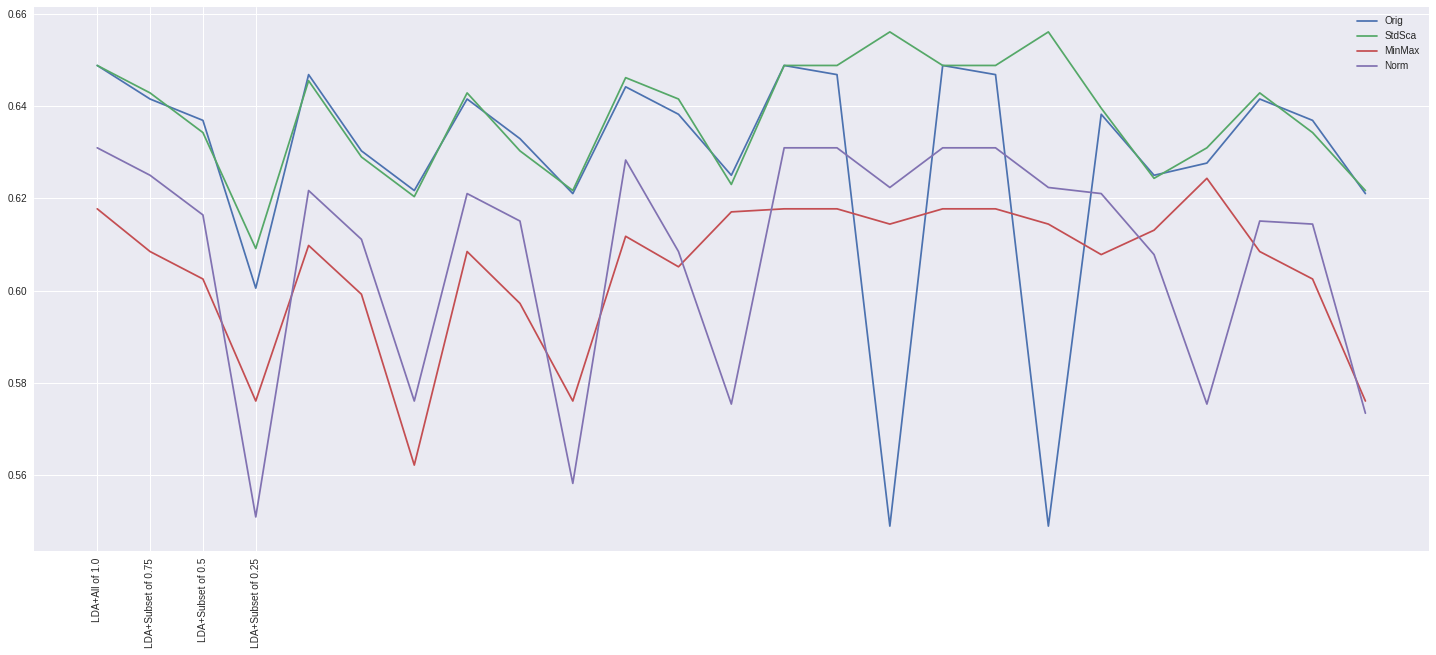

In [89]:
fig, ax = plt.subplots()
##Plot each transformation
for trans in trans_list:
     plt.plot(acc[trans])
##Set the tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb,rotation='vertical')
##Display the plot
plt.legend(trans_list,loc='best')    
##Plot the accuracy for all combinations
plt.show()    


In [84]:
[x[5] for x in X_all_add]


[['Elevation',
  'Wilderness_Area4',
  'Horizontal_Distance_To_Roadways',
  'Horizontal_Distance_To_Fire_Points',
  'Horizontal_Distance_To_Hydrology',
  'Vertical_Distance_To_Hydrology',
  'Hillshade_9am',
  'Aspect',
  'Hillshade_Noon',
  'Soil_Type10',
  'Hillshade_3pm',
  'Slope',
  'Soil_Type38',
  'Soil_Type39',
  'Soil_Type3',
  'Soil_Type4',
  'Wilderness_Area3',
  'Wilderness_Area1',
  'Soil_Type40',
  'Soil_Type2',
  'Soil_Type17',
  'Soil_Type30',
  'Soil_Type12',
  'Soil_Type32',
  'Soil_Type23',
  'Soil_Type13',
  'Soil_Type22',
  'Soil_Type11',
  'Soil_Type29',
  'Soil_Type33',
  'Soil_Type31',
  'Soil_Type35',
  'Soil_Type6',
  'Soil_Type24',
  'Wilderness_Area2',
  'Soil_Type20',
  'Soil_Type1',
  'Soil_Type16',
  'Soil_Type5'],
 ['Elevation',
  'Wilderness_Area4',
  'Horizontal_Distance_To_Roadways',
  'Horizontal_Distance_To_Fire_Points',
  'Horizontal_Distance_To_Hydrology',
  'Vertical_Distance_To_Hydrology',
  'Aspect',
  'Hillshade_9am',
  'Hillshade_Noon',
  'Hil

In [97]:


#Evaluation of various combinations of LogisticRegression using all the views

#Import the library
from sklearn.linear_model import LogisticRegression

C_list = [100]

for C in C_list:
    #Set the base model
    model = LogisticRegression(n_jobs=-1,random_state=seed,C=C)
   
    algo = "LR"

    ##Set figure size
    #plt.rc("figure", figsize=(25, 10))

    #Accuracy of the model using all features
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all:
        model.fit(X[:,i_cols_list],Y_train)
        result = model.score(X_val[:,i_cols_list], Y_val)
        acc[trans].append(result)
        #print(trans+"+"+name+"+%d" % (v*(c-1)))
        #print(result)
    comb.append("%s with C=%s+%s of %s" % (algo,C,"All",1.0))

    #Accuracy of the model using a subset of features    
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
        model.fit(X[:,i_cols_list],Y_train)
        result = model.score(X_val[:,i_cols_list], Y_val)
        acc[trans].append(result)
        #print(trans+"+"+name+"+%d" % (v*(c-1)))
        #print(result)
    for v in ratio_list:
        comb.append("%s with C=%s+%s of %s" % (algo,C,"Subset",v))

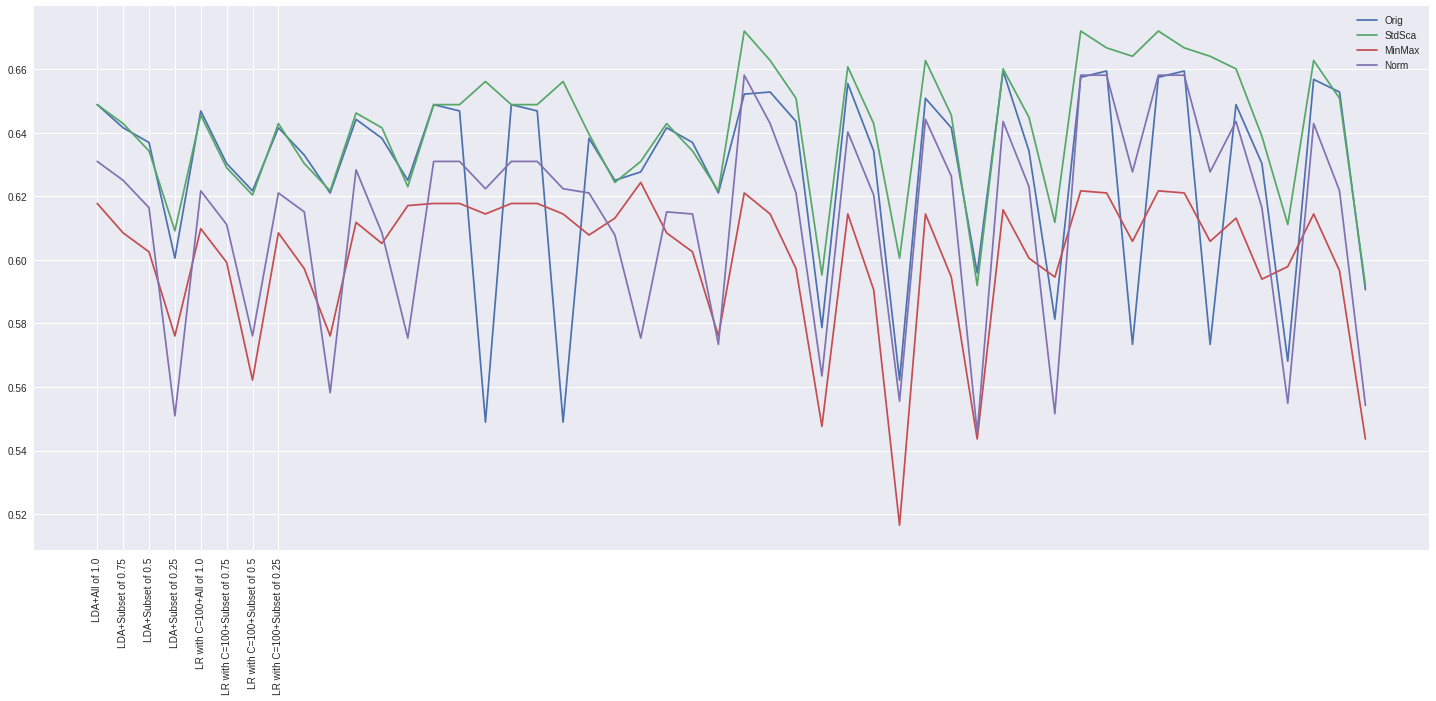

In [98]:
##Plot the accuracies of all combinations
fig, ax = plt.subplots()
##Plot each transformation
for trans in trans_list:
      plt.plot(acc[trans])
##Set the tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb,rotation='vertical')
##Display the plot
plt.legend(trans_list,loc='best')    
##Plot the accuracy for all combinations
plt.show()    
      
#Best estimated performance is close to 67% with LR when C=100 and all attributes are considered and with standardized data
#Performance improves will increasing value of C
#Performance of Normalizer and MinMax Scaler is poor in general


In [100]:
#Evaluation of various combinations of XG Boost using all the views

#Import the library
from xgboost import XGBClassifier

n_list = [300]

for n_estimators in n_list:
    #Set the base model
    model = XGBClassifier(n_estimators=n_estimators, seed=seed,subsample=0.25)
   
    algo = "XGB"

    #Set figure size
    plt.rc("figure", figsize=(20, 10))

    #Accuracy of the model using all features
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all:
        model.fit(X[:,i_cols_list],Y_train)
        result = model.score(X_val[:,i_cols_list], Y_val)
        acc[trans].append(result)
        #print(trans+"+"+name+"+%d" % (v*(c-1)))
        #print(result)
    comb.append("%s with n=%s+%s of %s" % (algo,n_estimators,"All",1.0))

    #Accuracy of the model using a subset of features    
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
        model.fit(X[:,i_cols_list],Y_train)
        result = model.score(X_val[:,i_cols_list], Y_val)
        acc[trans].append(result)
        #print(trans+"+"+name+"+%d" % (v*(c-1)))
        #print(result)
    for v in ratio_list:
        comb.append("%s with n=%s+%s of %s" % (algo,n_estimators,"Subset",v))

In [101]:
len(X_all_add)

96

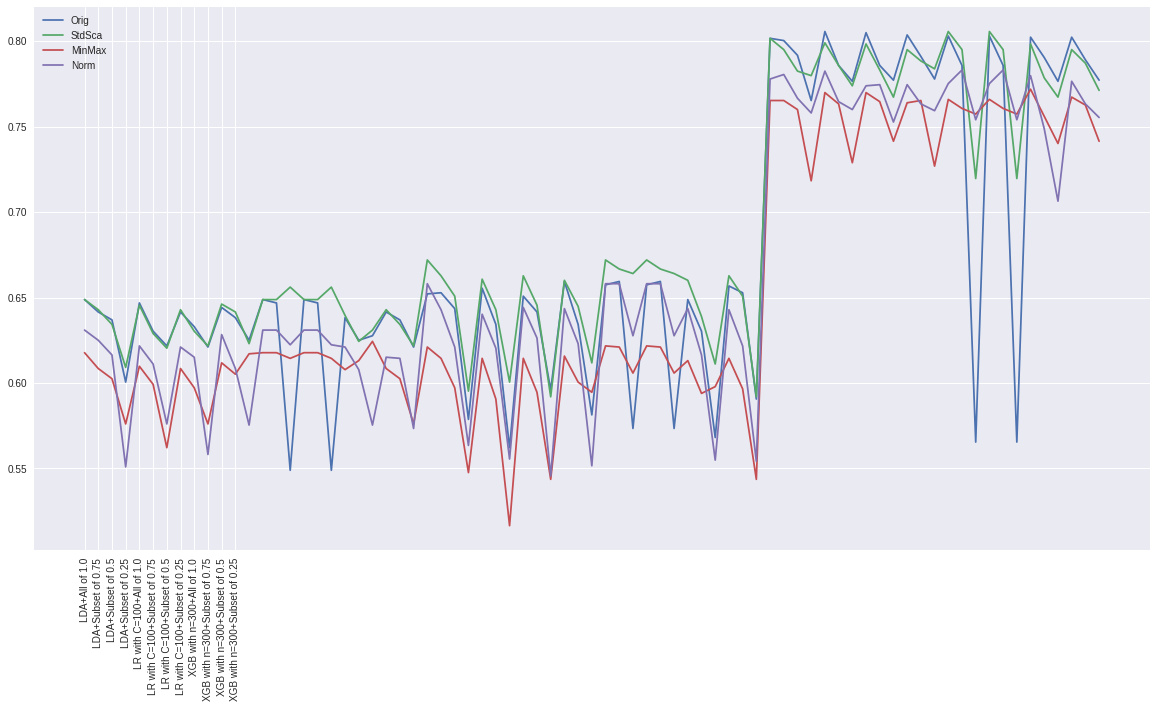

In [103]:
fig, ax = plt.subplots()
##Plot each transformation
for trans in trans_list:
      plt.plot(acc[trans])
##Set the tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb,rotation='vertical')
##Display the plot
plt.legend(trans_list,loc='best')    
##Plot the accuracy for all combinations
plt.show() 

In [107]:
#Evaluation of baseline model of MLP using all the views

#Import libraries for deep learning
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense

#Import libraries for encoding
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

#no. of output classes
y = 7

#random state
numpy.random.seed(seed)

# one hot encode class values
encoder = LabelEncoder()
Y_train_en = encoder.fit_transform(Y_train)
Y_train_hot = np_utils.to_categorical(Y_train_en,y) 
Y_val_en = encoder.fit_transform(Y_val)
Y_val_hot = np_utils.to_categorical(Y_val_en,y) 


# define baseline model
def baseline(v):
     # create model
     model = Sequential()
     model.add(Dense(v*(c-1), input_dim=v*(c-1), init='normal', activation='relu'))
     model.add(Dense(y, init='normal', activation='sigmoid'))
     # Compile model
     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
     return model

# define smaller model
def smaller(v):
 # create model
 model = Sequential()
 model.add(Dense(v*(c-1)/2, input_dim=v*(c-1), init='normal', activation='relu'))
 model.add(Dense(y, init='normal', activation='sigmoid'))
 # Compile model
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model

# define deeper model
def deeper(v):
 # create model
 model = Sequential()
 model.add(Dense(v*(c-1), input_dim=v*(c-1), init='normal', activation='relu'))
 model.add(Dense(v*(c-1)/2, init='normal', activation='relu'))
 model.add(Dense(y, init='normal', activation='sigmoid'))
 # Compile model
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model

# Optimize using dropout and decay
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.constraints import maxnorm

def dropout(v):
    #create model
    model = Sequential()
    model.add(Dense(v*(c-1), input_dim=v*(c-1), init='normal', activation='relu',W_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(v*(c-1)/2, init='normal', activation='relu', W_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(y, init='normal', activation='sigmoid'))
    # Compile model
    sgd = SGD(lr=0.1,momentum=0.9,decay=0.0,nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

# define decay model
def decay(v):
    # create model
    model = Sequential()
    model.add(Dense(v*(c-1), input_dim=v*(c-1), init='normal', activation='relu'))
    model.add(Dense(y, init='normal', activation='sigmoid'))
    # Compile model
    sgd = SGD(lr=0.1,momentum=0.8,decay=0.01,nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model
    
est_list = [('MLP',baseline),('smaller',smaller),('deeper',deeper),('dropout',dropout),('decay',decay)]

for name, est in est_list:
 
    algo = name

    #Set figure size
    plt.rc("figure", figsize=(20, 10))

    #Accuracy of the model using all features
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all:
        model = KerasClassifier(build_fn=est, v=v, nb_epoch=10, verbose=0)
        model.fit(X[:,i_cols_list],Y_train_hot)
        result = model.score(X_val[:,i_cols_list], Y_val_hot)
        acc[trans].append(result)
    #    print(trans+"+"+name+"+%d" % (v*(c-1)))
    #    print(result)
    comb.append("%s+%s of %s" % (algo,"All",1.0))

    ##Accuracy of the model using a subset of features    
    #for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
    #    model = KerasClassifier(build_fn=est, v=v, nb_epoch=10, verbose=0)
    #    model.fit(X[:,i_cols_list],Y_train_hot)
    #    result = model.score(X_val[:,i_cols_list], Y_val_hot)
    #    acc[trans].append(result)
    #    print(trans+"+"+name+"+%d" % (v*(c-1)))
    #    print(result)
    #for v in ratio_list:
    #    comb.append("%s+%s of %s" % (algo,"Subset",v))

#Plot the accuracies of all combinations
fig, ax = plt.subplots()
#Plot each transformation
for trans in trans_list:
        plt.plot(acc[trans])
#Set the tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb,rotation='vertical')
#Display the plot
plt.legend(trans_list,loc='best')    
#Plot the accuracy for all combinations
plt.show()    

# Best estimated performance is 71% 
# Performance is poor is general. Data transformations make a huge difference.

Using TensorFlow backend.


ImportError: No module named tensorflow

In [116]:


# Make predictions using Extra Tress Classifier + 0.5 subset as it gave the best estimated performance

n_estimators = 100

#Obtain the list of indexes for the required model
indexes = []
for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
    if v == 0.5:
        if trans == 'Orig':
            indexes = i_cols_list
            break

#Best model definition
best_model = ExtraTreesClassifier(n_jobs=-1,n_estimators=n_estimators)
best_model.fit(X_orig[:,indexes],Y)

#Read test dataset
dataset_test = pandas.read_csv("test.csv")
#Drop unnecessary columns
ID = dataset_test['Id']
dataset_test.drop('Id',axis=1,inplace=True)
dataset_test.drop(rem,axis=1,inplace=True)
X_test = dataset_test.values

#Make predictions using the best model
predictions = best_model.predict(X_test[:,indexes])
# Write submissions to output file in the correct format
with open("submission.csv", "w") as subfile:
    subfile.write("Id,Cover_Type\n")
    for i, pred in enumerate(list(predictions)):
        subfile.write("%s,%s\n"%(ID[i],pred))



NameError: name 'X_orig' is not defined

In [165]:
 for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
        print trans,name,v
        

Orig ExTree 0.75
Orig ExTree 0.5
Orig ExTree 0.25
Orig GraBst 0.75
Orig GraBst 0.5
Orig GraBst 0.25
Orig RndFst 0.75
Orig RndFst 0.5
Orig RndFst 0.25
Orig XGB 0.75
Orig XGB 0.5
Orig XGB 0.25
StdSca ExTree 0.75
StdSca ExTree 0.5
StdSca ExTree 0.25
StdSca GraBst 0.75
StdSca GraBst 0.5
StdSca GraBst 0.25
StdSca RndFst 0.75
StdSca RndFst 0.5
StdSca RndFst 0.25
StdSca XGB 0.75
StdSca XGB 0.5
StdSca XGB 0.25
MinMax ExTree 0.75
MinMax ExTree 0.5
MinMax ExTree 0.25
MinMax GraBst 0.75
MinMax GraBst 0.5
MinMax GraBst 0.25
MinMax RndFst 0.75
MinMax RndFst 0.5
MinMax RndFst 0.25
MinMax XGB 0.75
MinMax XGB 0.5
MinMax XGB 0.25
Norm ExTree 0.75
Norm ExTree 0.5
Norm ExTree 0.25
Norm GraBst 0.75
Norm GraBst 0.5
Norm GraBst 0.25
Norm RndFst 0.75
Norm RndFst 0.5
Norm RndFst 0.25
Norm XGB 0.75
Norm XGB 0.5
Norm XGB 0.25
Orig RFE 0.75
Orig RFE 0.5
Orig RFE 0.25
StdSca RFE 0.75
StdSca RFE 0.5
StdSca RFE 0.25
MinMax RFE 0.75
MinMax RFE 0.5
MinMax RFE 0.25
Norm RFE 0.75
Norm RFE 0.5
Norm RFE 0.25
Orig RFE 0.7

In [157]:
dataset_test = test
#Drop unnecessary columns
ID = dataset_test['Id']
dataset_test.drop('Id',axis=1,inplace=True)
dataset_test.drop(rem,axis=1,inplace=True)
X_test = dataset_test.values


In [158]:
dataset_test.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2680     354     14                                 0   
1       2683       0     13                                 0   
2       2713      16     15                                 0   
3       2709      24     17                                 0   
4       2706      29     19                                 0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                             2684   
1                               0                             2654   
2                               0                             2980   
3                               0                             2950   
4                               0                             2920   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            196             214            156   
1            201             216            152   
2            206             208            137   
3            208             201            125   
4            210             195            115   

   Horizontal_Distance_To_Fire_Points     ...       Soil_Type31  Soil_Type32  \
0                                6645     ...                 0            0   
1                                6675     ...                 0            0   
2                                6344     ...                 0            0   
3                                6374     ...                 0            0   
4                                6404     ...                 0            0   

   Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type38  Soil_Type39  Soil_Type40  
0            0            0            0  
1            0            0            0  
2            0            0            0  
3            0            0            0  
4            0            0            0  

[5 rows x 54 columns]

In [159]:
#Evaluation of various combinations of Extra Trees using all the views

#Import the library
from sklearn.ensemble import ExtraTreesClassifier

n_list = [100]

for n_estimators in n_list:
    #Set the base model
    model = ExtraTreesClassifier(n_jobs=-1,n_estimators=n_estimators, random_state=seed)
   
    algo = "ET"

    #Set figure size
    plt.rc("figure", figsize=(20, 10))

    #Accuracy of the model using all features
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all:
        model.fit(X[:,i_cols_list],Y_train)
        result = model.score(X_val[:,i_cols_list], Y_val)
        acc[trans].append(result)
        #print(trans+"+"+name+"+%d" % (v*(c-1)))
        #print(result)
    comb.append("%s with n=%s+%s of %s" % (algo,n_estimators,"All",1.0))

    #Accuracy of the model using a subset of features    
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
        model.fit(X[:,i_cols_list],Y_train)
        result = model.score(X_val[:,i_cols_list], Y_val)
        acc[trans].append(result)
        #print(trans+"+"+name+"+%d" % (v*(c-1)))
        #print(result)
    for v in ratio_list:
        comb.append("%s with n=%s+%s of %s" % (algo,n_estimators,"Subset",v))
    
##Plot the accuracies of all combinations
#fig, ax = plt.subplots()
##Plot each transformation
#for trans in trans_list:
#        plt.plot(acc[trans])
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Display the plot
#plt.legend(trans_list,loc='best')    
##Plot the accuracy for all combinations
#plt.show()    

#Best estimated performance is close to 88% when n_estimators is 100 , StdScaler with 0.75

In [188]:
for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
    if v == 0.5:
        if trans == 'Orig':
            if name == 'ExTree':
                indexes = i_cols_list; rem = rem_list
                    
            break
            
        

In [189]:
rem

['Soil_Type23',
 'Soil_Type33',
 'Soil_Type11',
 'Soil_Type29',
 'Soil_Type31',
 'Soil_Type35',
 'Soil_Type6',
 'Soil_Type24',
 'Wilderness_Area2',
 'Soil_Type20',
 'Soil_Type1',
 'Soil_Type5',
 'Soil_Type16',
 'Soil_Type14',
 'Soil_Type18',
 'Soil_Type37',
 'Soil_Type34',
 'Soil_Type26',
 'Soil_Type19',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type21',
 'Soil_Type36',
 'Soil_Type9',
 'Soil_Type25',
 'Soil_Type8']

In [190]:
dataset_test = test
#Drop unnecessary columns

dataset_test.drop(rem,axis=1,inplace=True)
X_test = dataset_test.values

In [204]:

dataset_train.drop('Cover_Type',axis=1,inplace=True)

X_train = dataset_train.values

In [205]:
dataset_train.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points     ...       Soil_Type12  Soil_Type13  \
0                                6279     ...                 0            0   
1                                6225     ...                 0            0   
2                                6121     ...                 1            0   
3                                6211     ...                 0            0   
4                                6172     ...                 0            0   

   Soil_Type15  Soil_Type17  Soil_Type22  Soil_Type30  Soil_Type32  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            1            0   
4            0            0            0            0            0   

   Soil_Type38  Soil_Type39  Soil_Type40  
0            0            0            0  
1            0            0            0  
2            0            0            0  
3            0            0            0  
4            0            0            0  

[5 rows x 28 columns]

In [207]:
best_model = ExtraTreesClassifier(n_jobs=-1,n_estimators=100)
best_model.fit(X_train,Y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [ ]:
predictions = best_model.predict(X_test)